In [34]:
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt


In [15]:
folders = ['json', 'gltf', 'gltf_on_demand', 'gltf_on_demand_multiple_files', 'gltf_on_demand_multiple_files_lod', 'gltf_on_demand_multiple_files_lod_active_scene']

iterations =['1', '2', '3']
fileNames = ['fps', 'results']
stats = ['FPS', 'MEMORY', 'CPU']

def readFilesIntoDataframes(folder):
    dfs = {}
    
        
    for fileName in fileNames:
        
        df_list = []
        for iteration in iterations:
            df = pd.read_json(f"results/{folder}/{iteration}/{fileName}.json")
            
            if 'GPU_MEMORY' in df.columns:
                del df['GPU_MEMORY']
            df_list.append(df)
            
        actual_df = pd.concat(df_list).groupby(level=0).mean()
        dfs[fileName] = actual_df
        
    return dfs

def get_domain_specific_dataframes():
    result = {}
    
    for stat in stats:
        result[stat] = []
    
    for config in folders:
        dfs = readFilesIntoDataframes(config)
        for stat in fileNames:
            df = dfs[stat]
            
            for col in df.columns:
                if (col != "TIME" and col != 'x' and col != 'y') :
                    name_replacement = {col: f"{config}_{col}"}
                    sub_df = df[["TIME", col]]
                    sub_df = df.rename(columns=name_replacement)
                    result[col].append(sub_df)

            
            
    return result

In [16]:
result = get_domain_specific_dataframes()

df_dict = {}

for stat, dfs in result.items():    
    
    correct_dfs = []
    
    for df in dfs:    
        correct_columns = list(filter(lambda col: '_x' not in col and '_y' not in col and ('_' in col or col == 'TIME'), df.columns))
        correct_df = df[correct_columns]
        correct_dfs.append(correct_df)

    df_merged = reduce(lambda left,right: pd.merge(left,right,on=['TIME'], how='outer'), correct_dfs)
    df_dict[stat] = df_merged

In [94]:
sns.set_context("poster")
sns.despine()
sns.set(font_scale = 3)
plt.rcParams['figure.figsize']=(40,40)

<Figure size 2880x2880 with 0 Axes>

In [76]:
fps_df = df_dict['FPS']
cpu_df = df_dict['CPU']
memory_df = df_dict['MEMORY']

fps_df = fps_df.drop('TIME', axis=1)
cpu_df = cpu_df.drop('TIME', axis=1)
memory_df = memory_df.drop('TIME', axis=1)


# FPS Statistics

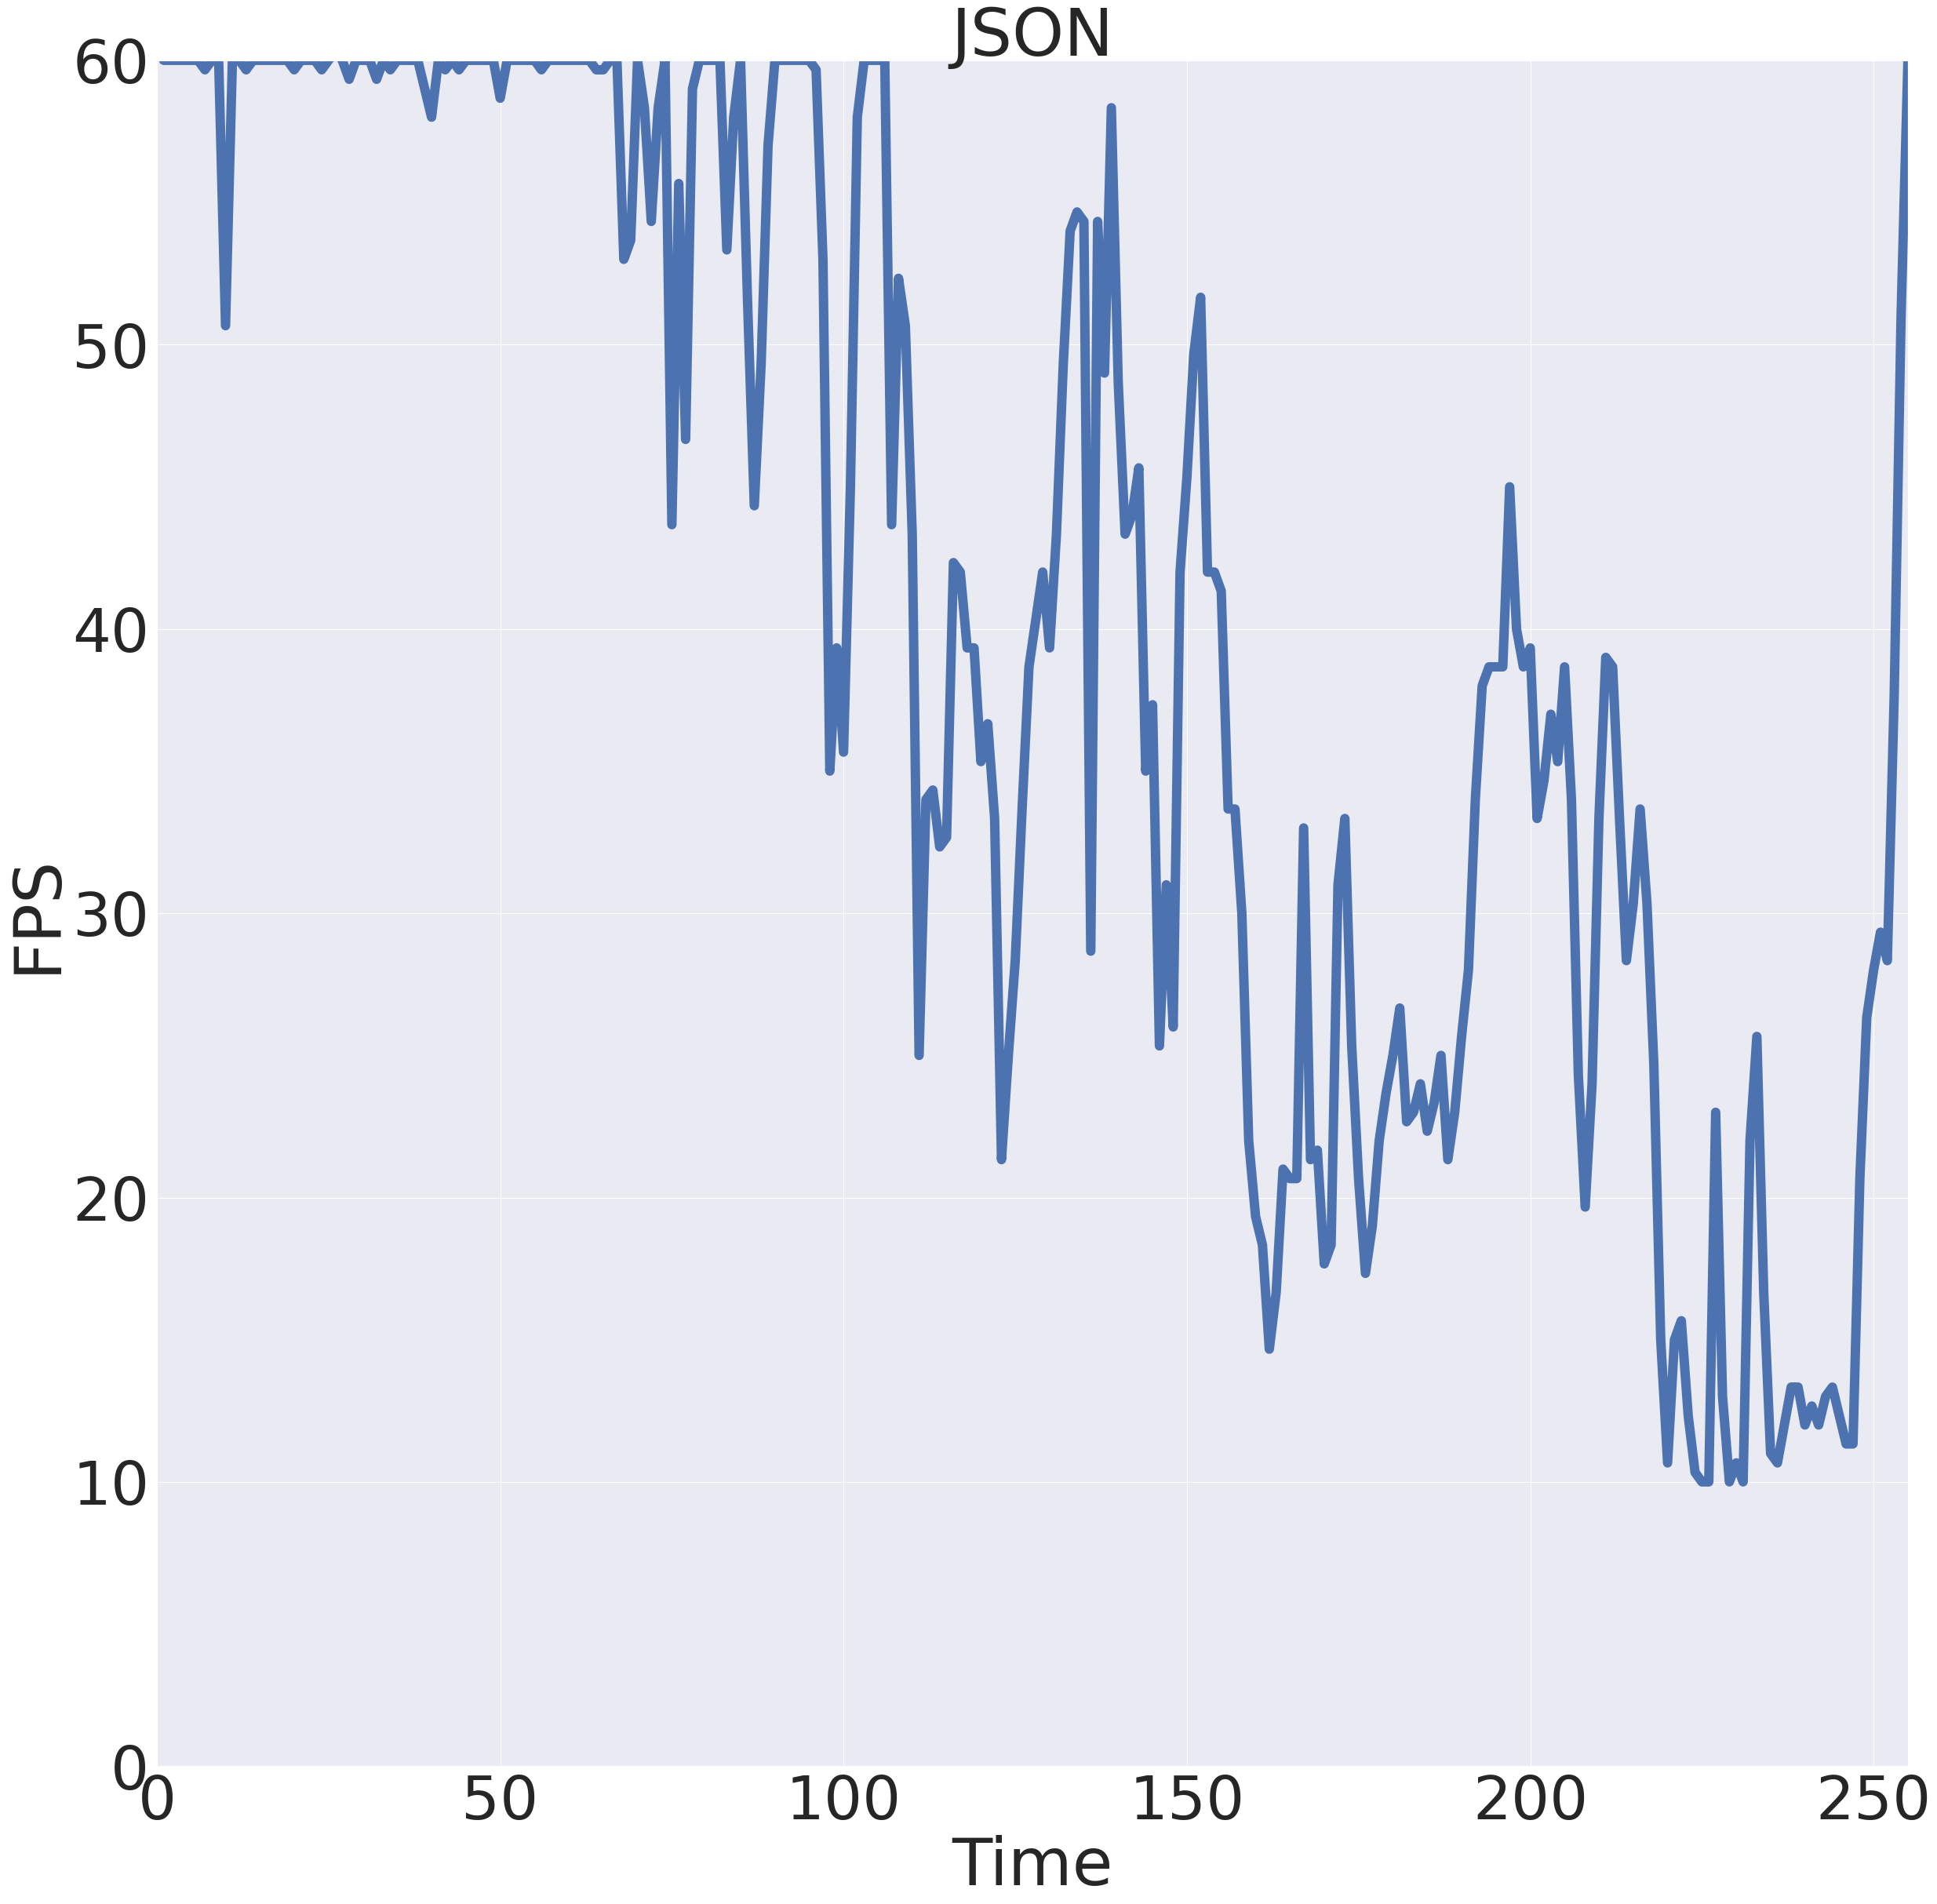

In [77]:
ax = sns.lineplot(data=fps_df['json_FPS'], linewidth='12')
ax.set(ylim=(0, 60))
ax.set(xlim=(0, 255))
ax.set(title='JSON', xlabel='Time', ylabel='FPS')
plt.show()

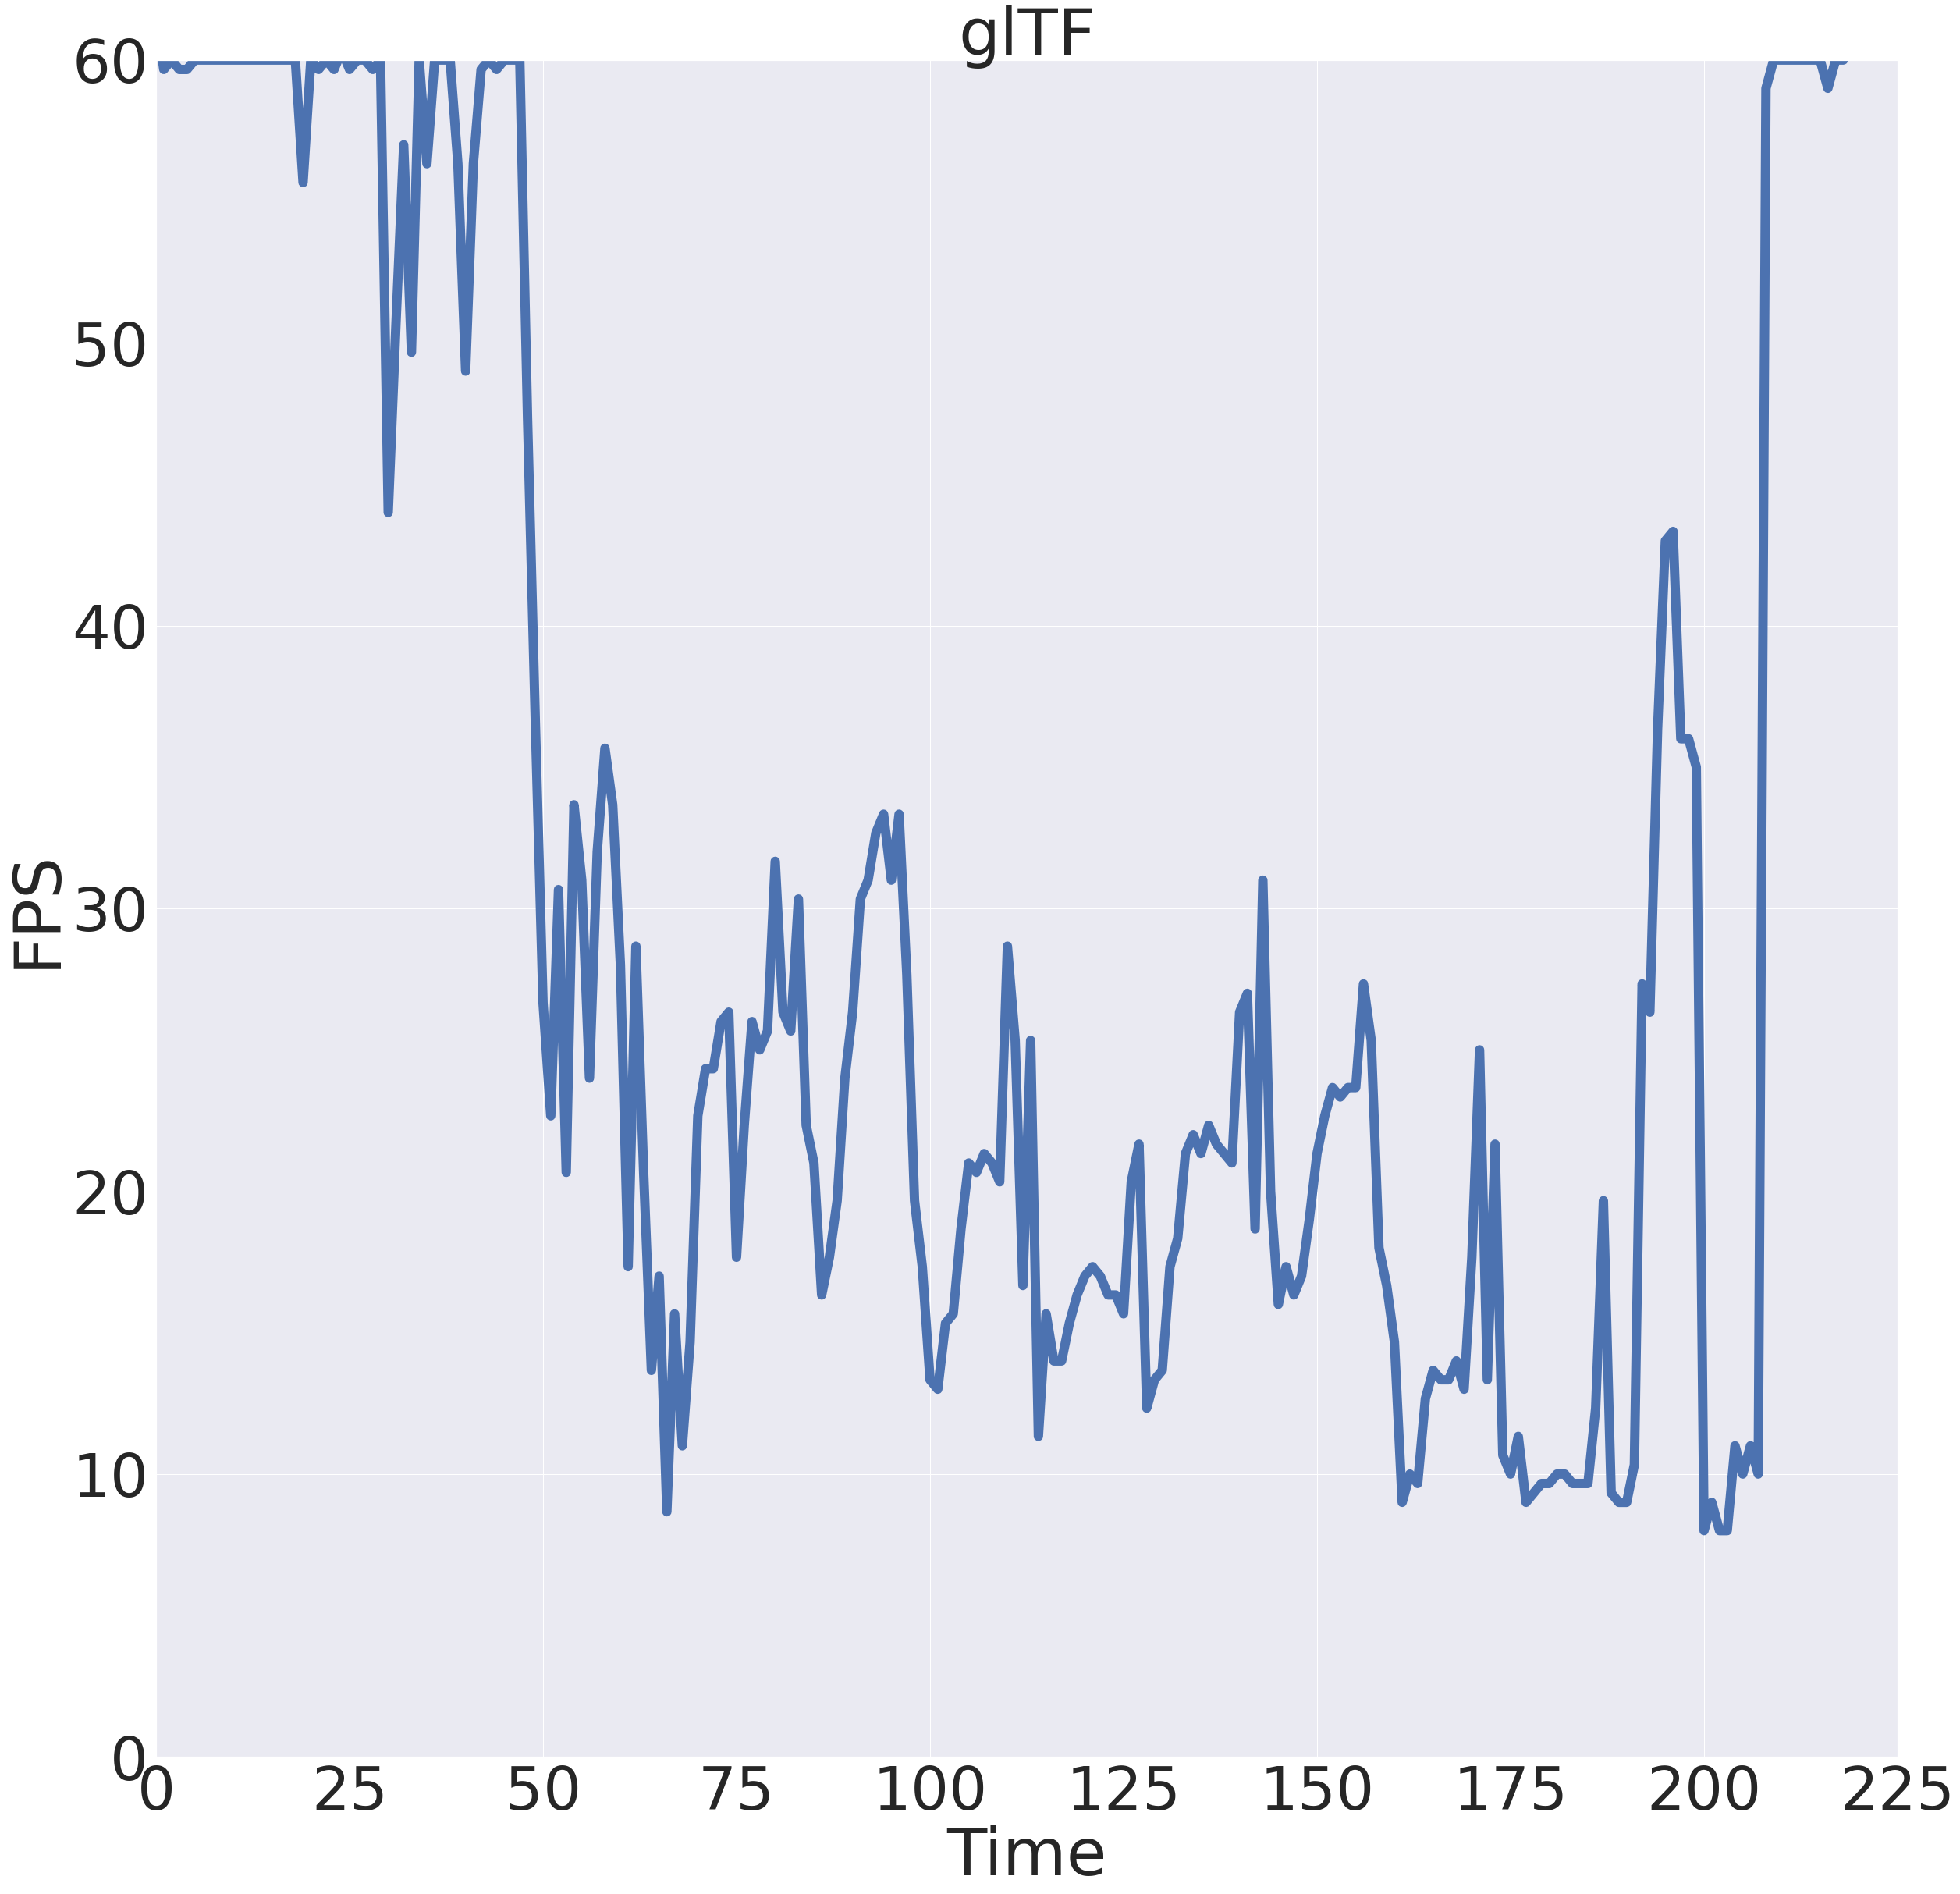

In [79]:
ax = sns.lineplot(data=fps_df['gltf_FPS'], linewidth='12')
ax.set(ylim=(0, 60))
ax.set(xlim=(0, 225))
ax.set(title='glTF', xlabel='Time', ylabel='FPS')
plt.show()

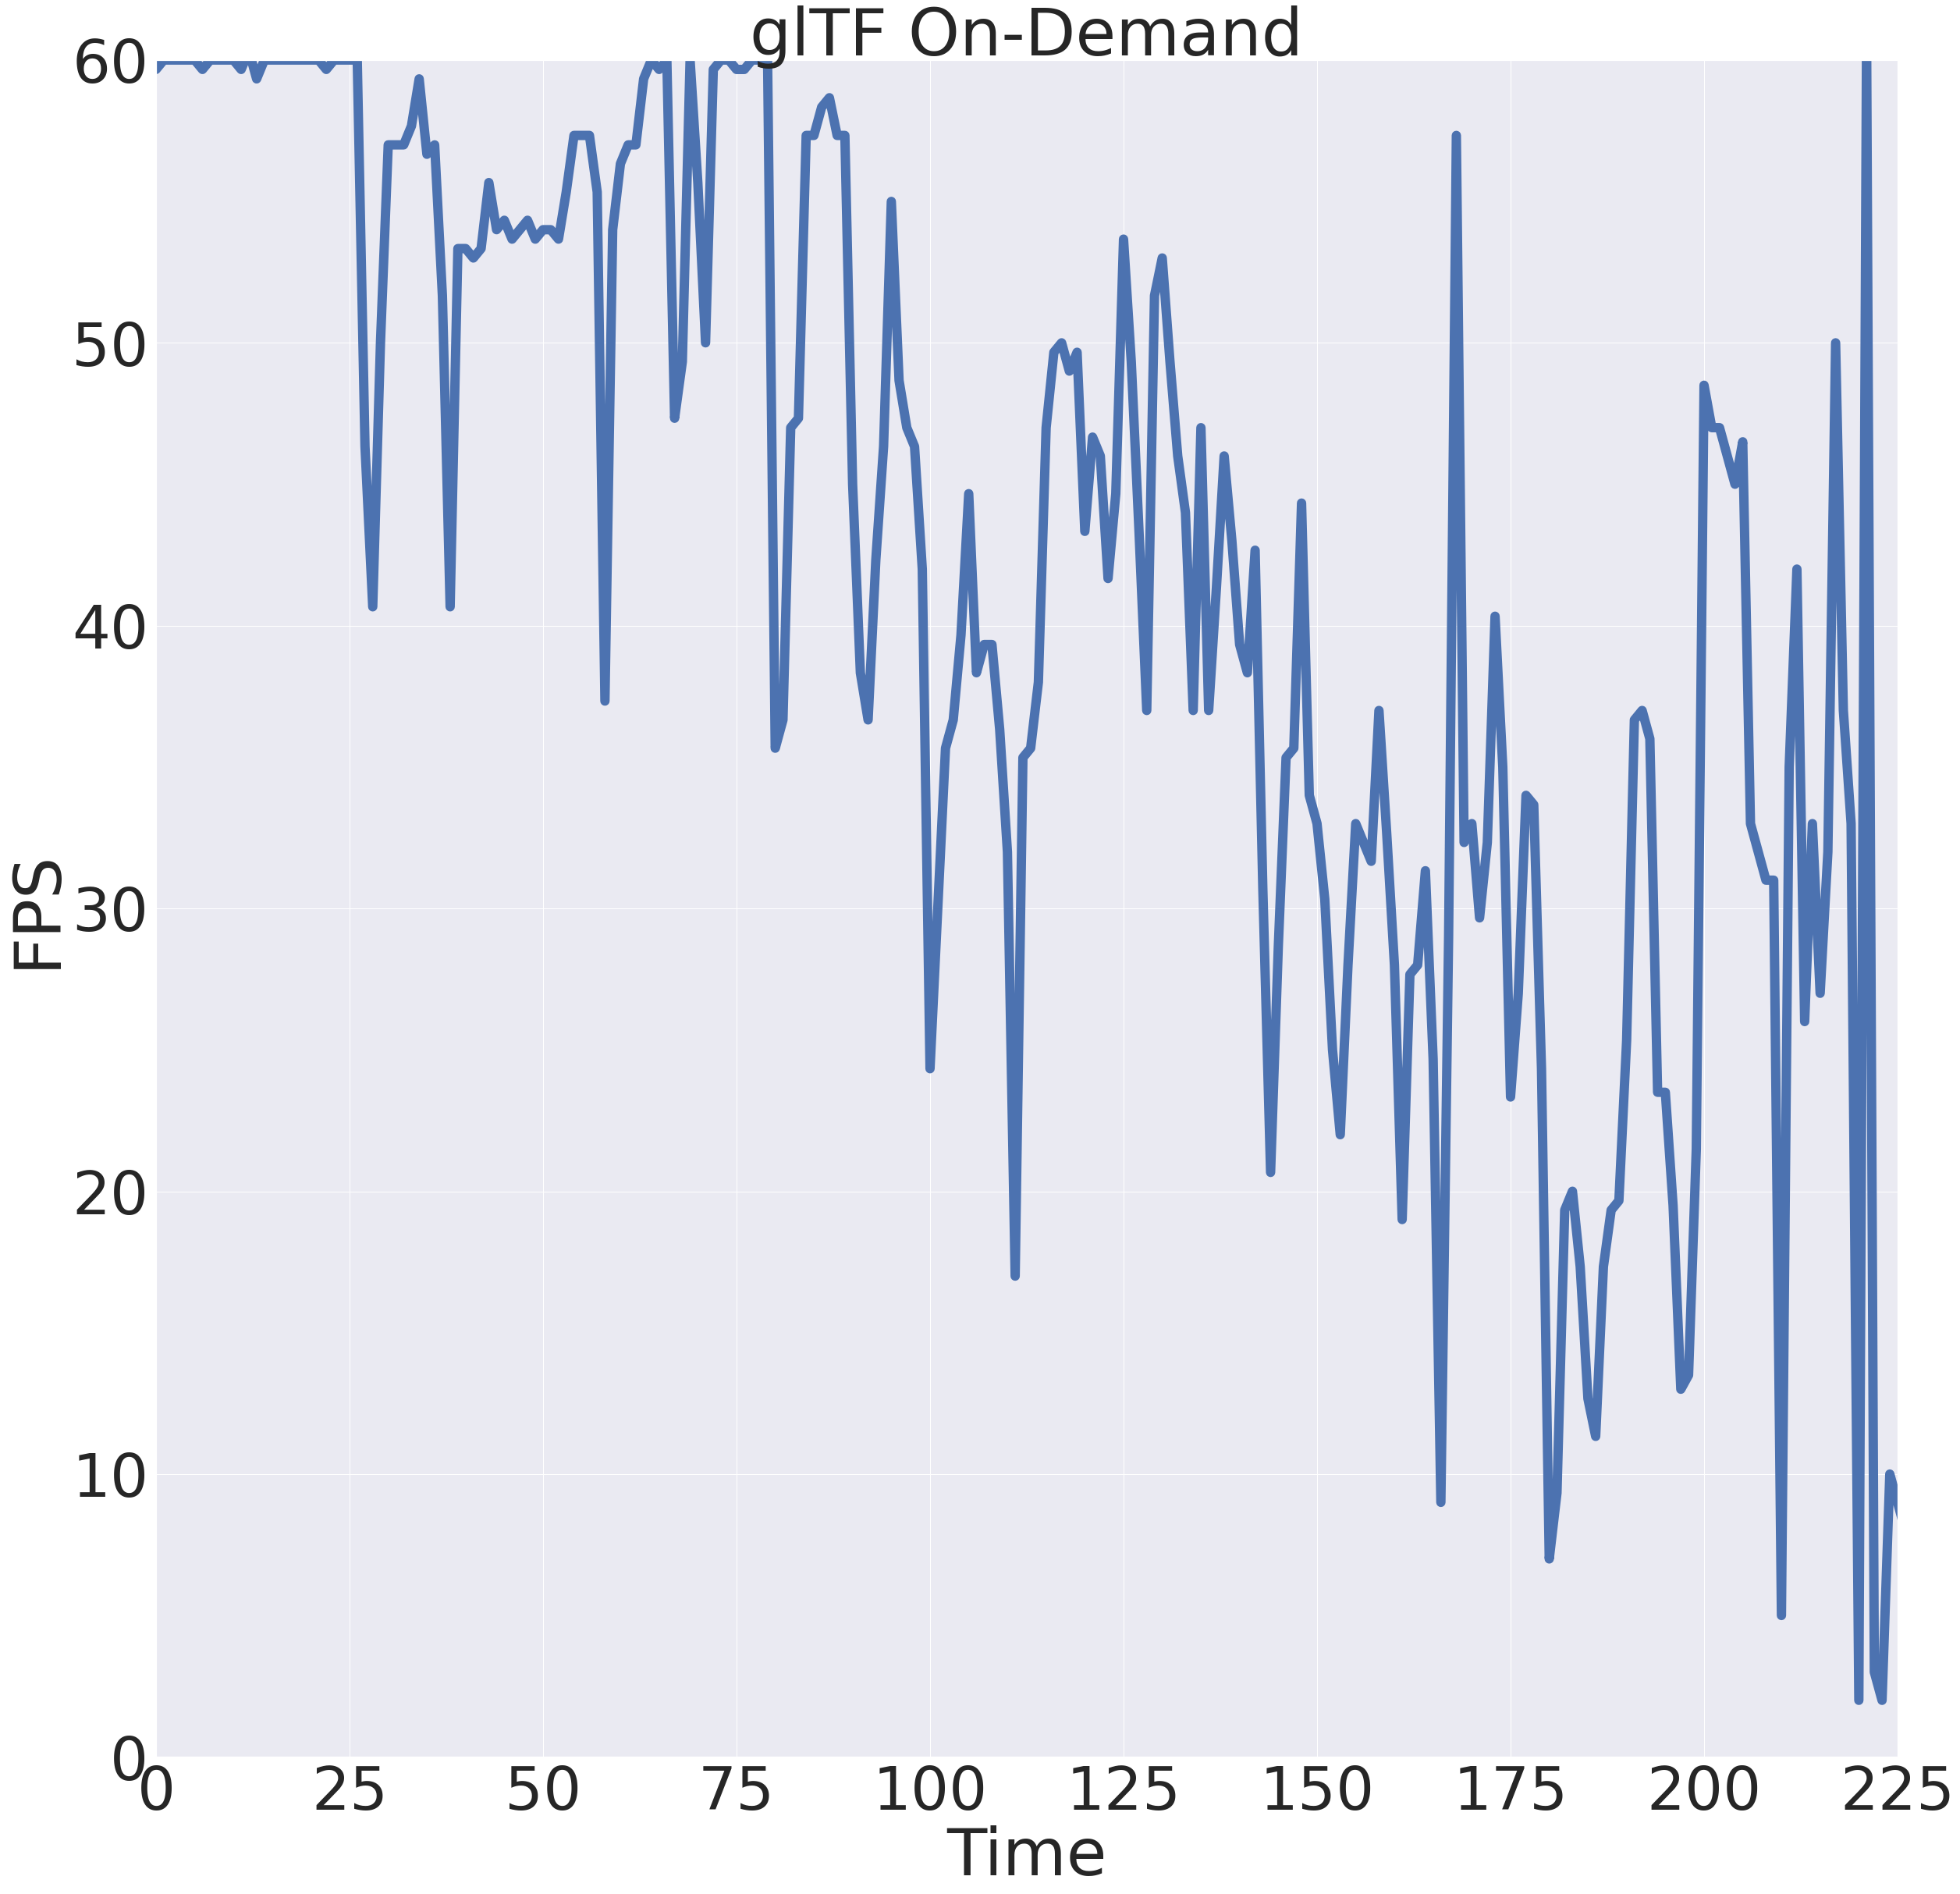

In [80]:
ax = sns.lineplot(data=fps_df['gltf_on_demand_FPS'], linewidth='12')
ax.set(ylim=(0, 60))
ax.set(xlim=(0, 225))
ax.set(title='glTF On-Demand', xlabel='Time', ylabel='FPS')
plt.show()

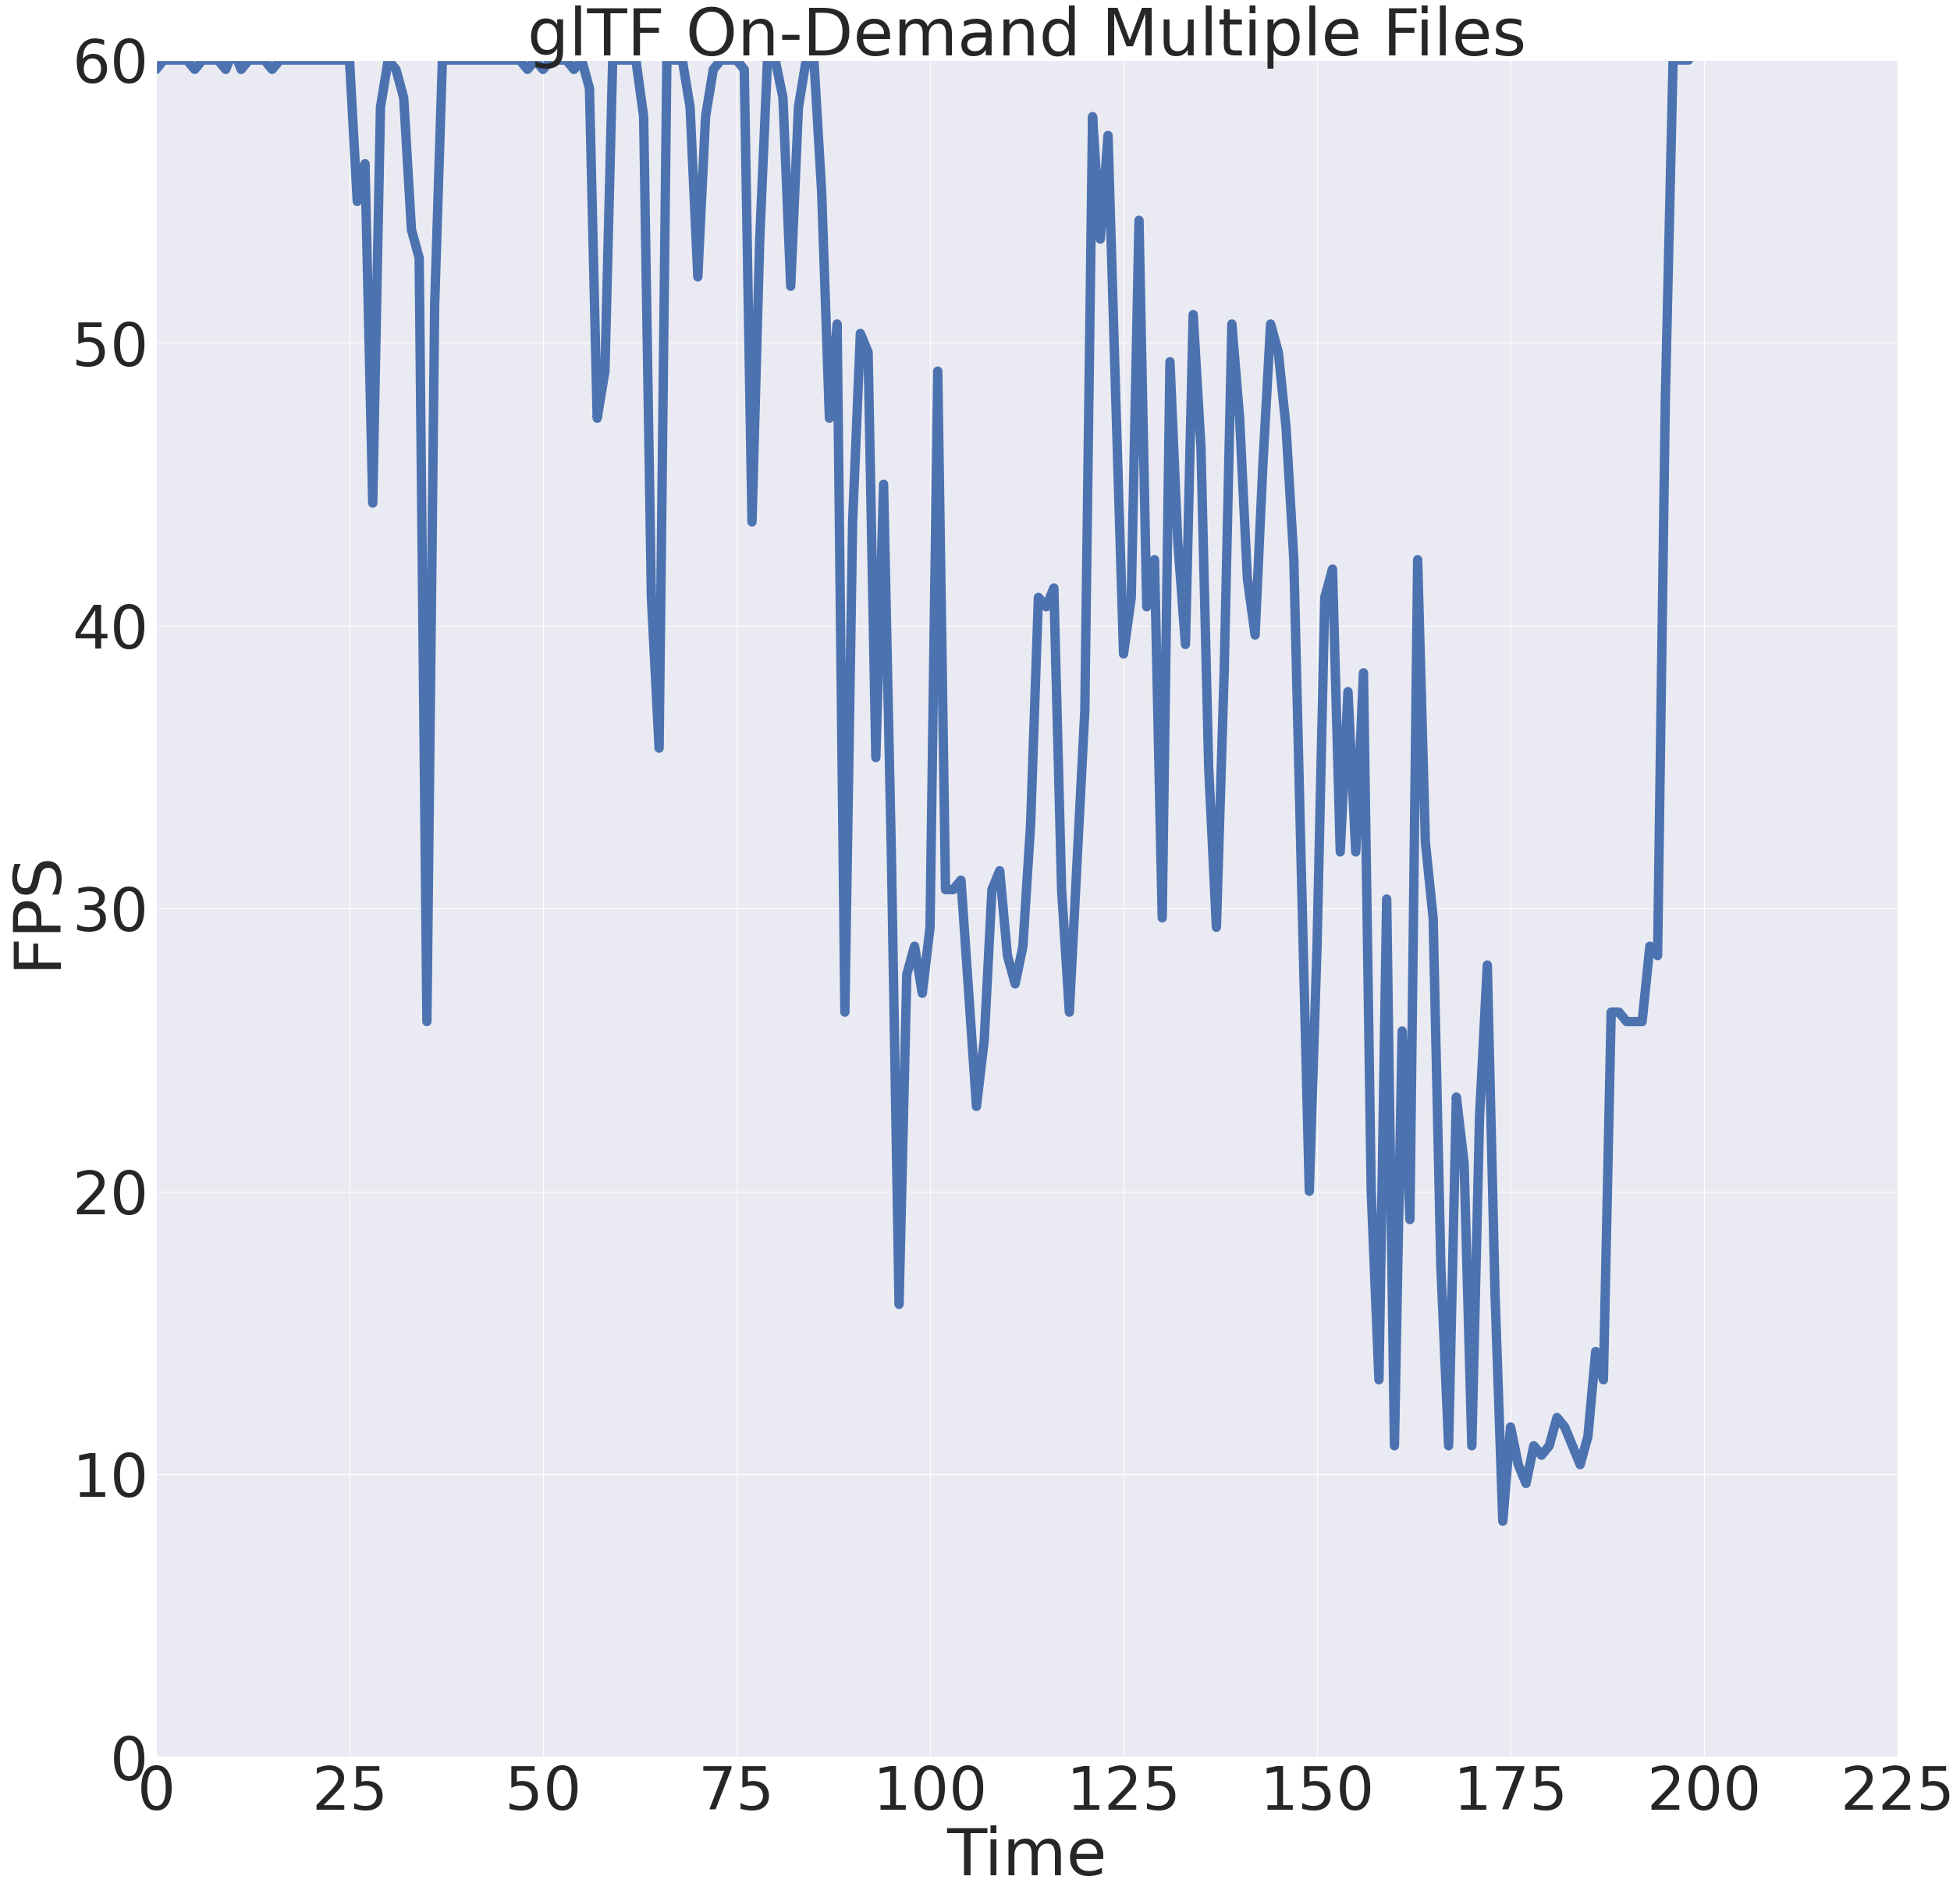

In [82]:
ax = sns.lineplot(data=fps_df['gltf_on_demand_multiple_files_FPS'], linewidth='12')
ax.set(ylim=(0, 60))
ax.set(xlim=(0, 225))
ax.set(title='glTF On-Demand Multiple Files', xlabel='Time', ylabel='FPS')
plt.show()

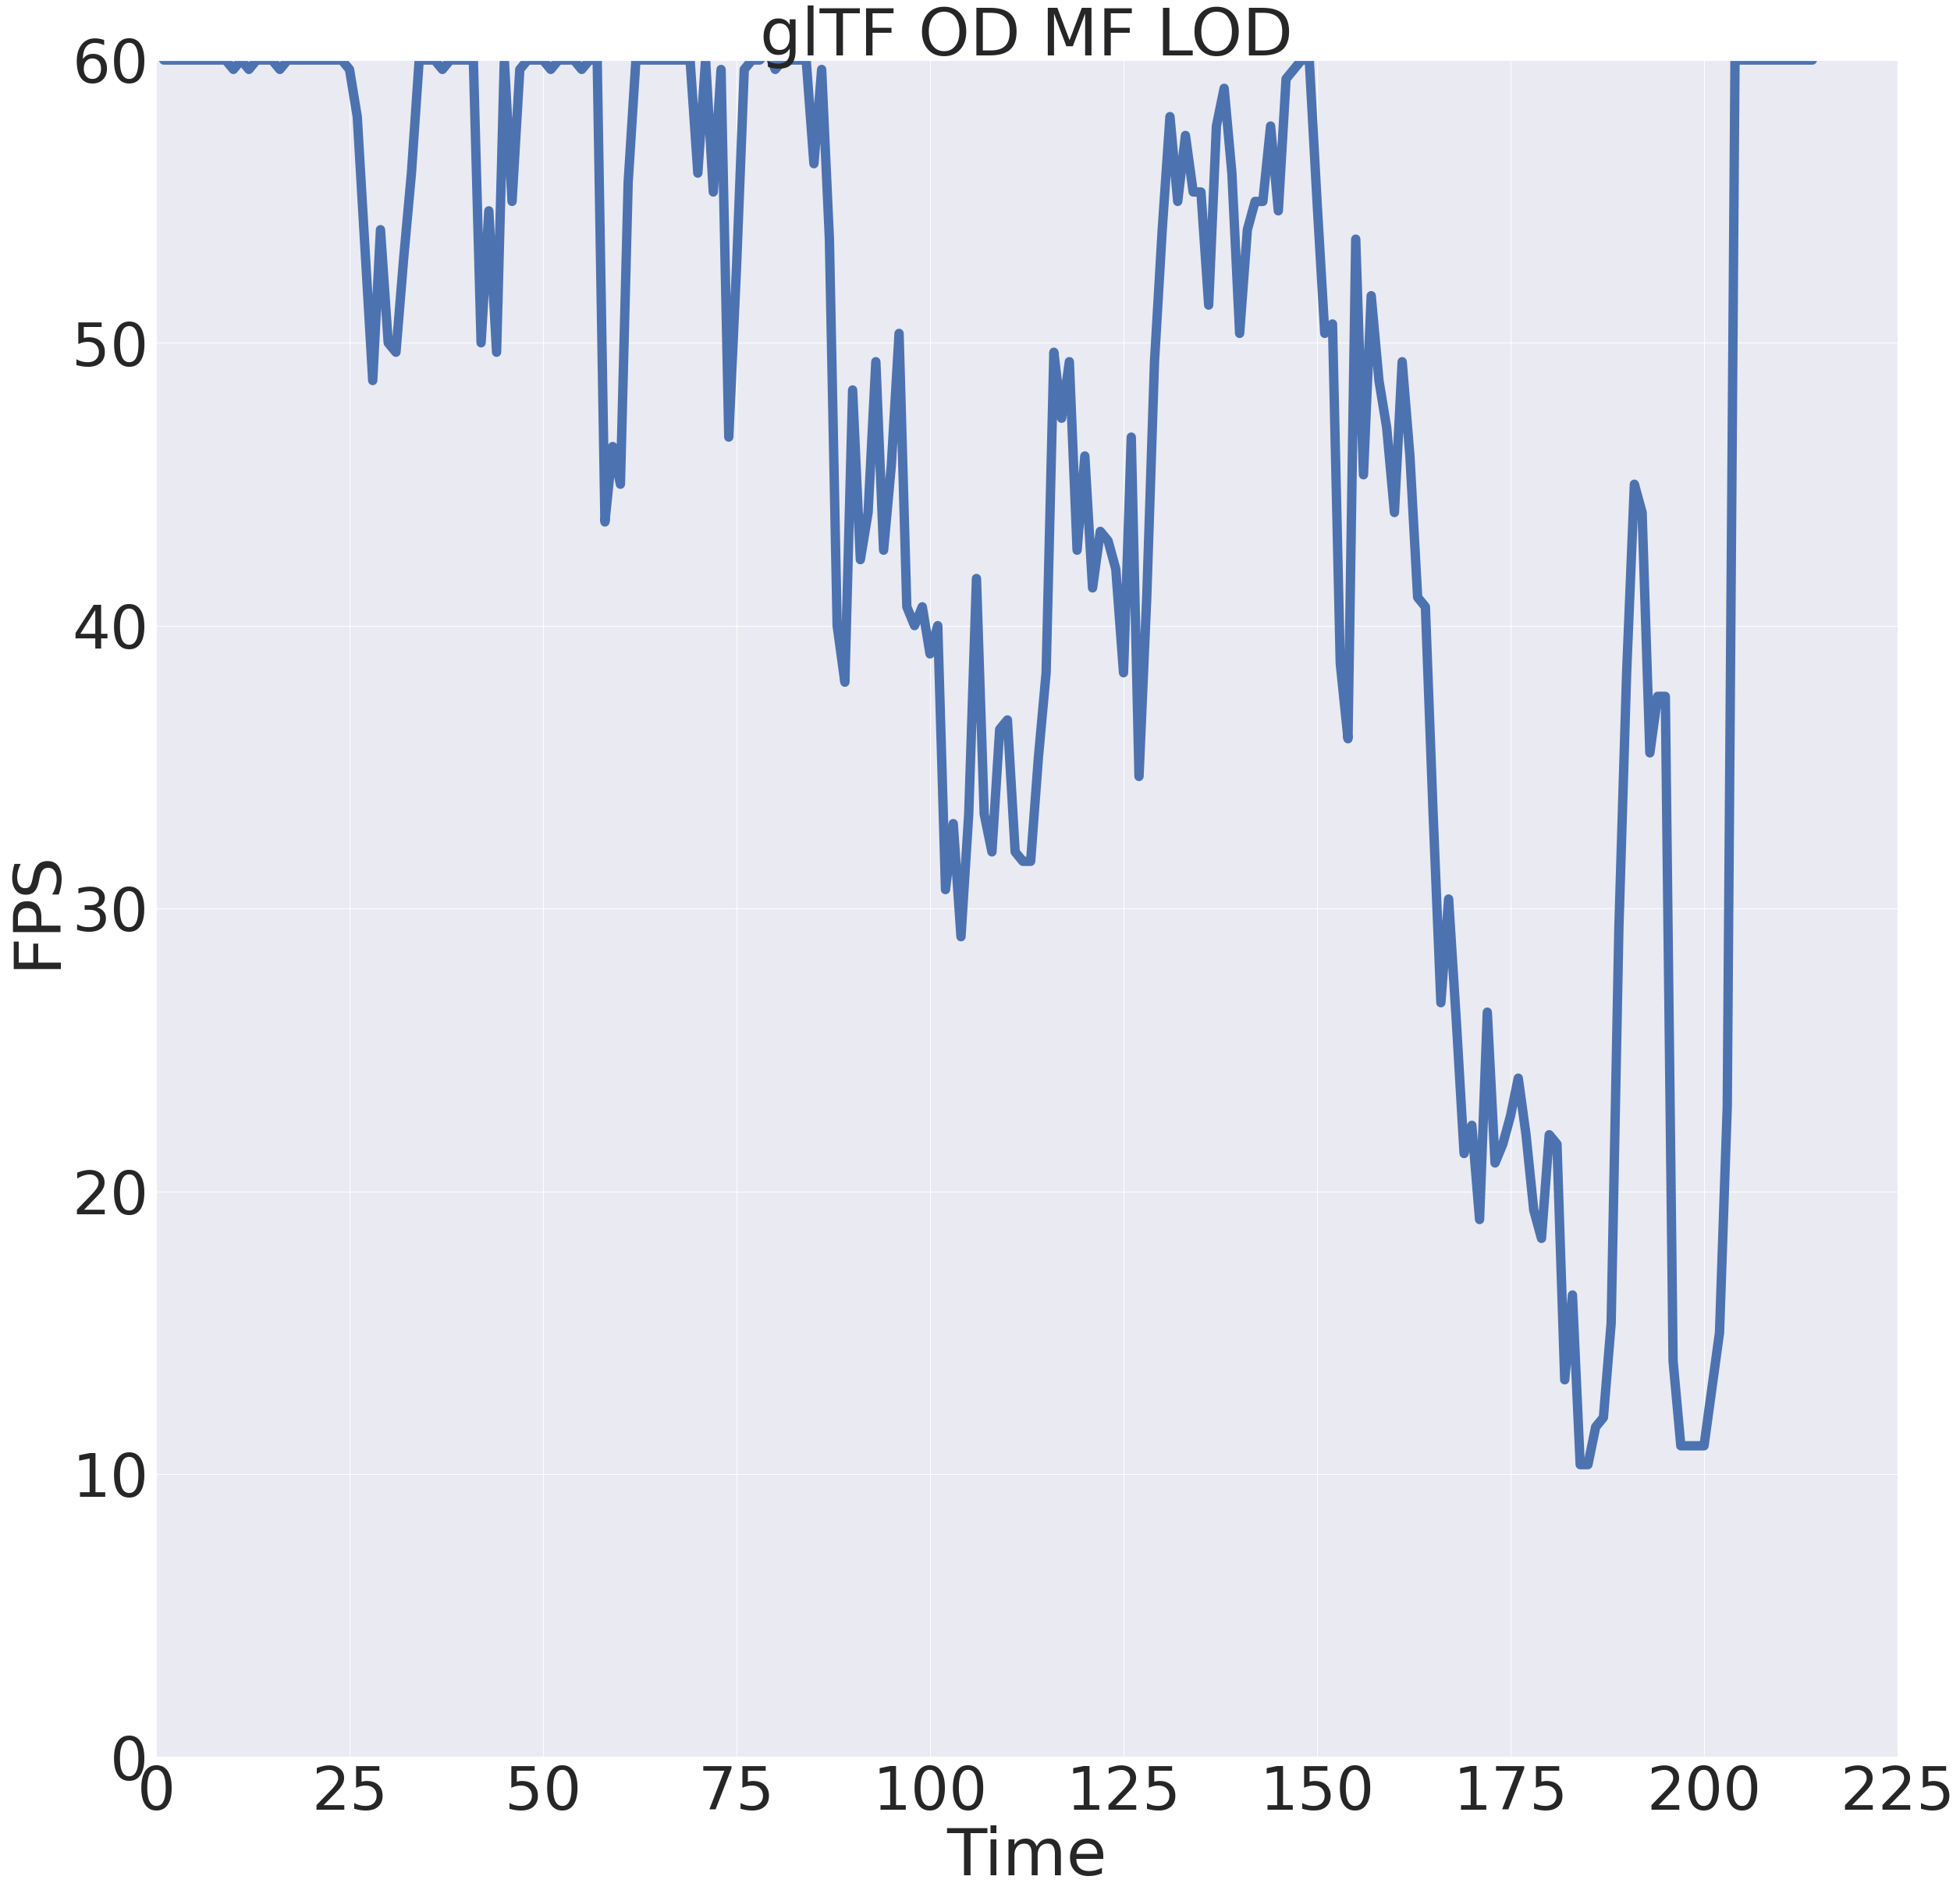

In [83]:
ax = sns.lineplot(data=fps_df['gltf_on_demand_multiple_files_lod_FPS'], linewidth='12')
ax.set(ylim=(0, 60))
ax.set(xlim=(0, 225))
ax.set(title='glTF OD MF LOD', xlabel='Time', ylabel='FPS')
plt.show()

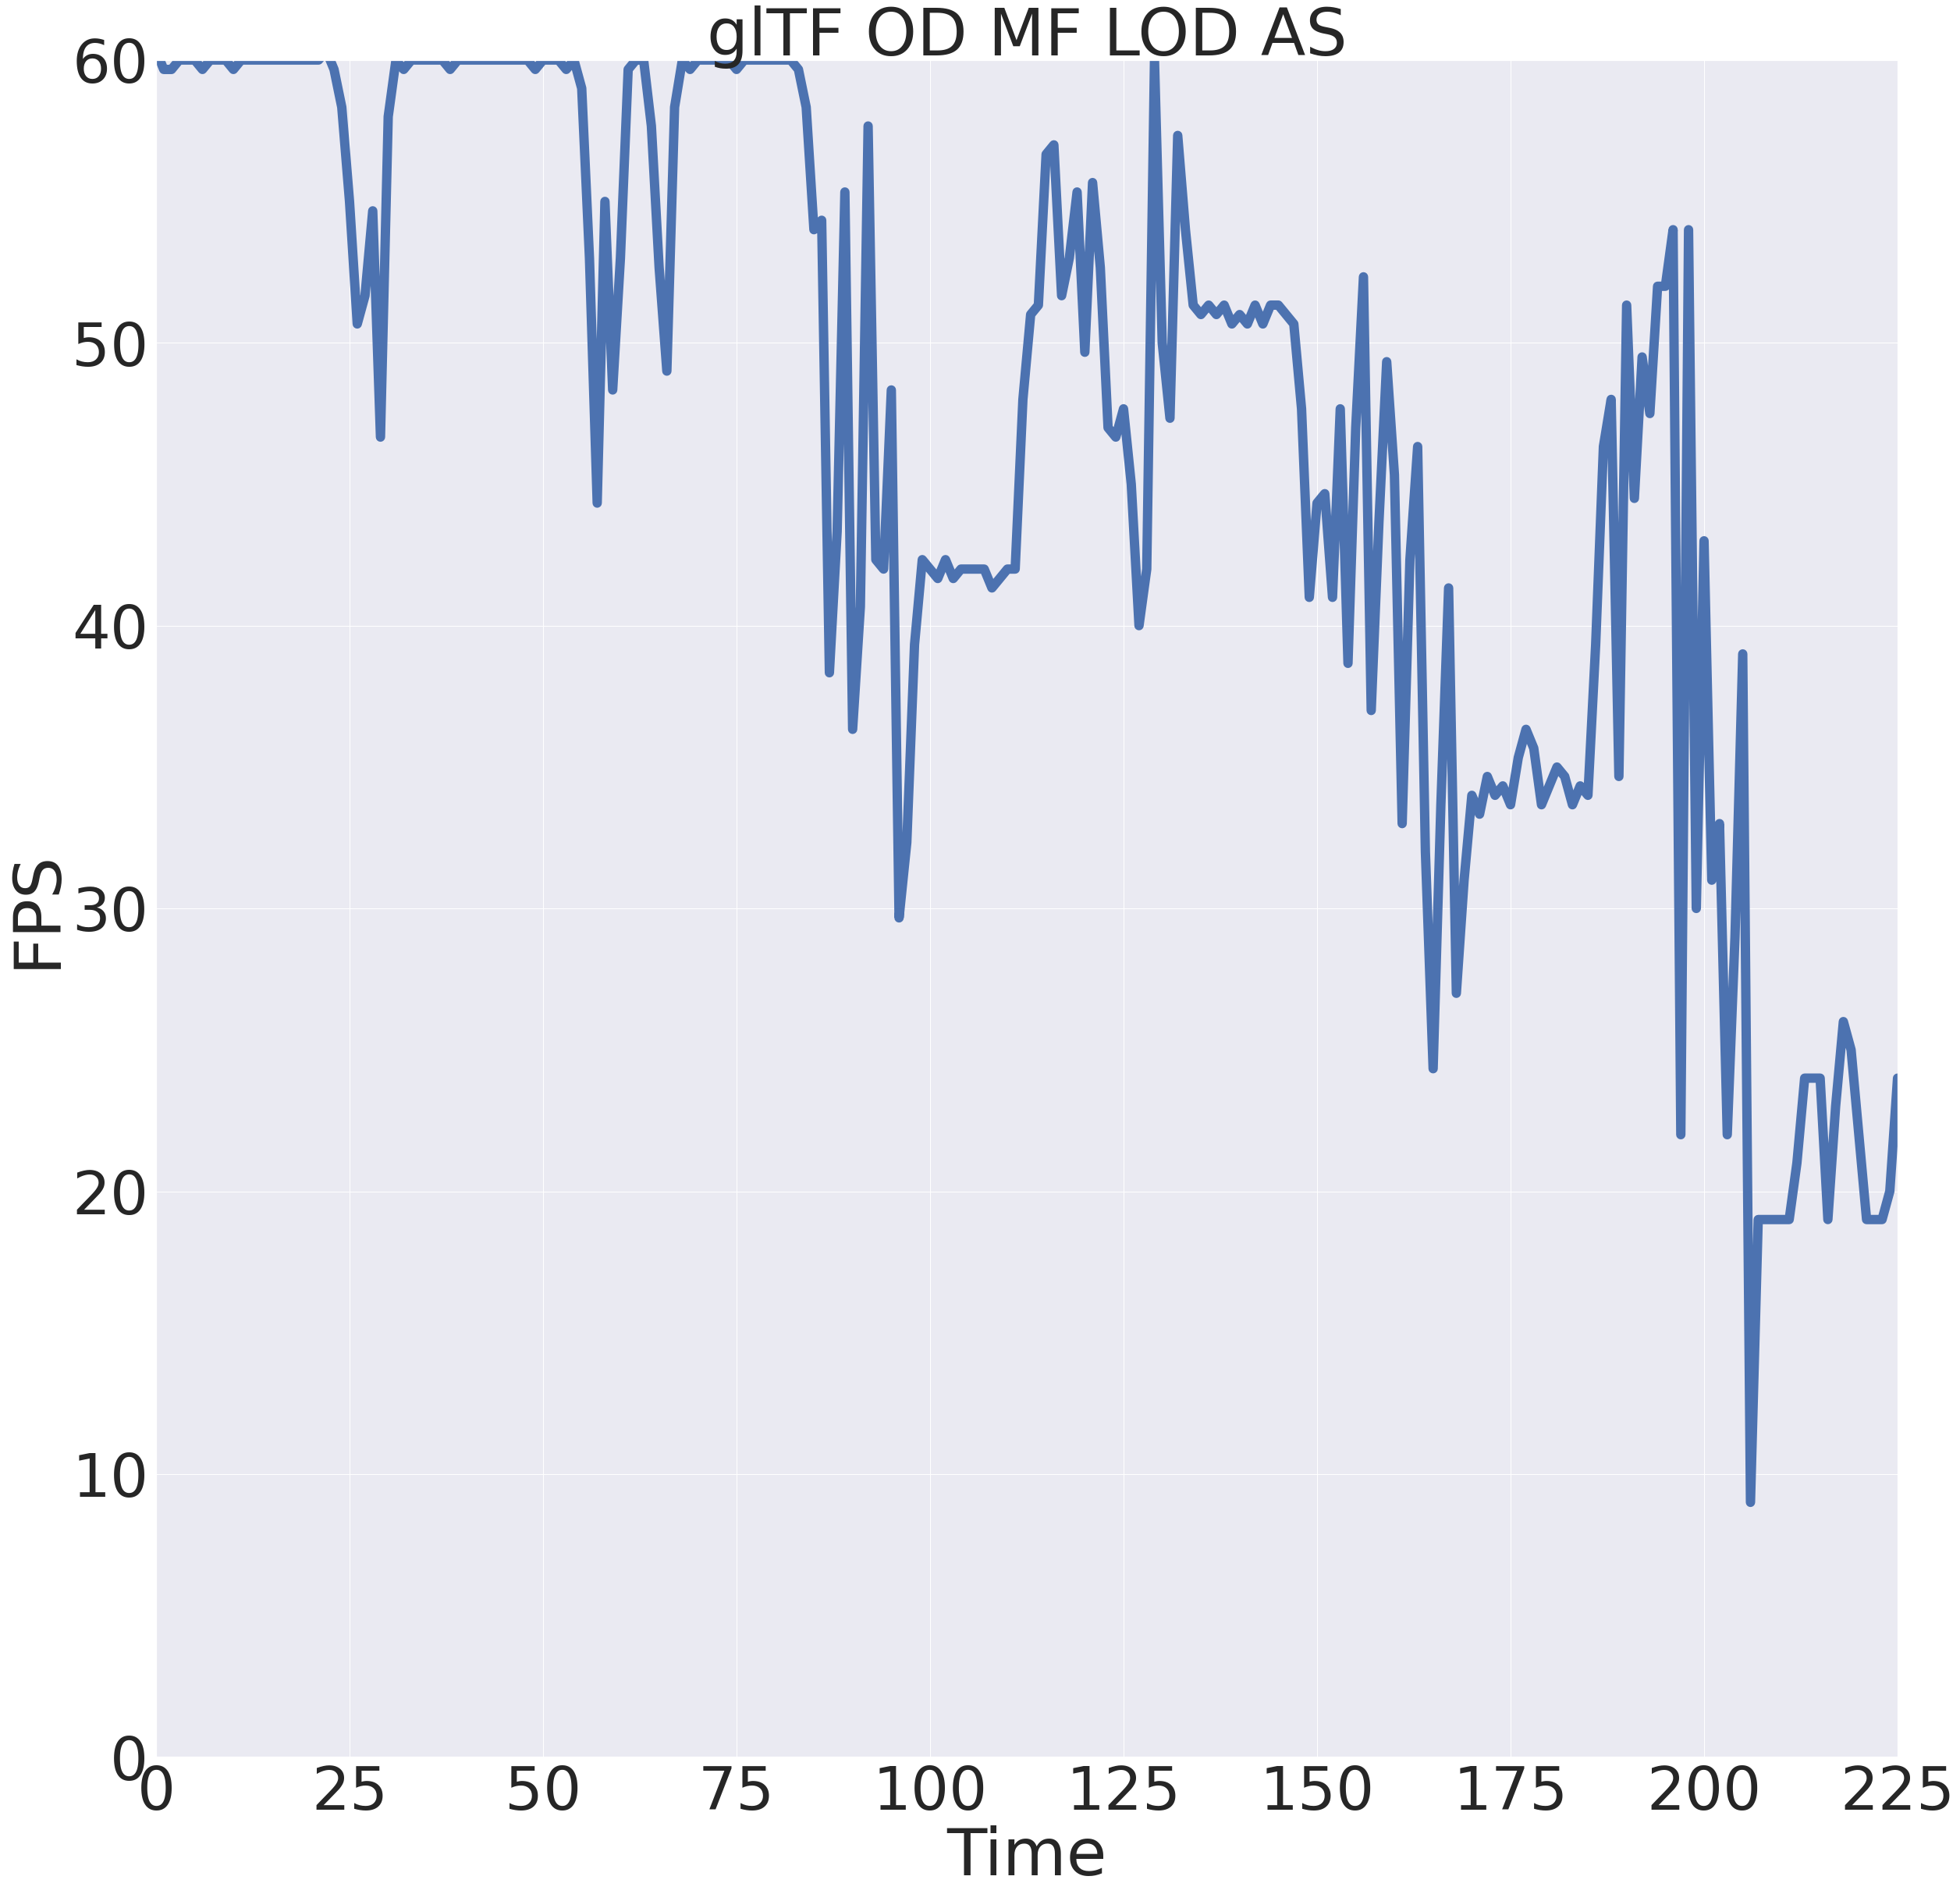

In [84]:
ax = sns.lineplot(data=fps_df['gltf_on_demand_multiple_files_lod_active_scene_FPS'],linewidth='12')
ax.set(ylim=(0, 60))
ax.set(xlim=(0, 225))
ax.set(title='glTF OD MF LOD AS', xlabel='Time', ylabel='FPS')
plt.show()

In [46]:
fps_avg = fps_df.mean()
fps_avg

json_FPS                                              46.760469
gltf_FPS                                              29.772194
gltf_on_demand_FPS                                    44.185930
gltf_on_demand_multiple_files_FPS                     43.353434
gltf_on_demand_multiple_files_lod_FPS                 47.257119
gltf_on_demand_multiple_files_lod_active_scene_FPS    50.298995
dtype: float64

# CPU Statistics

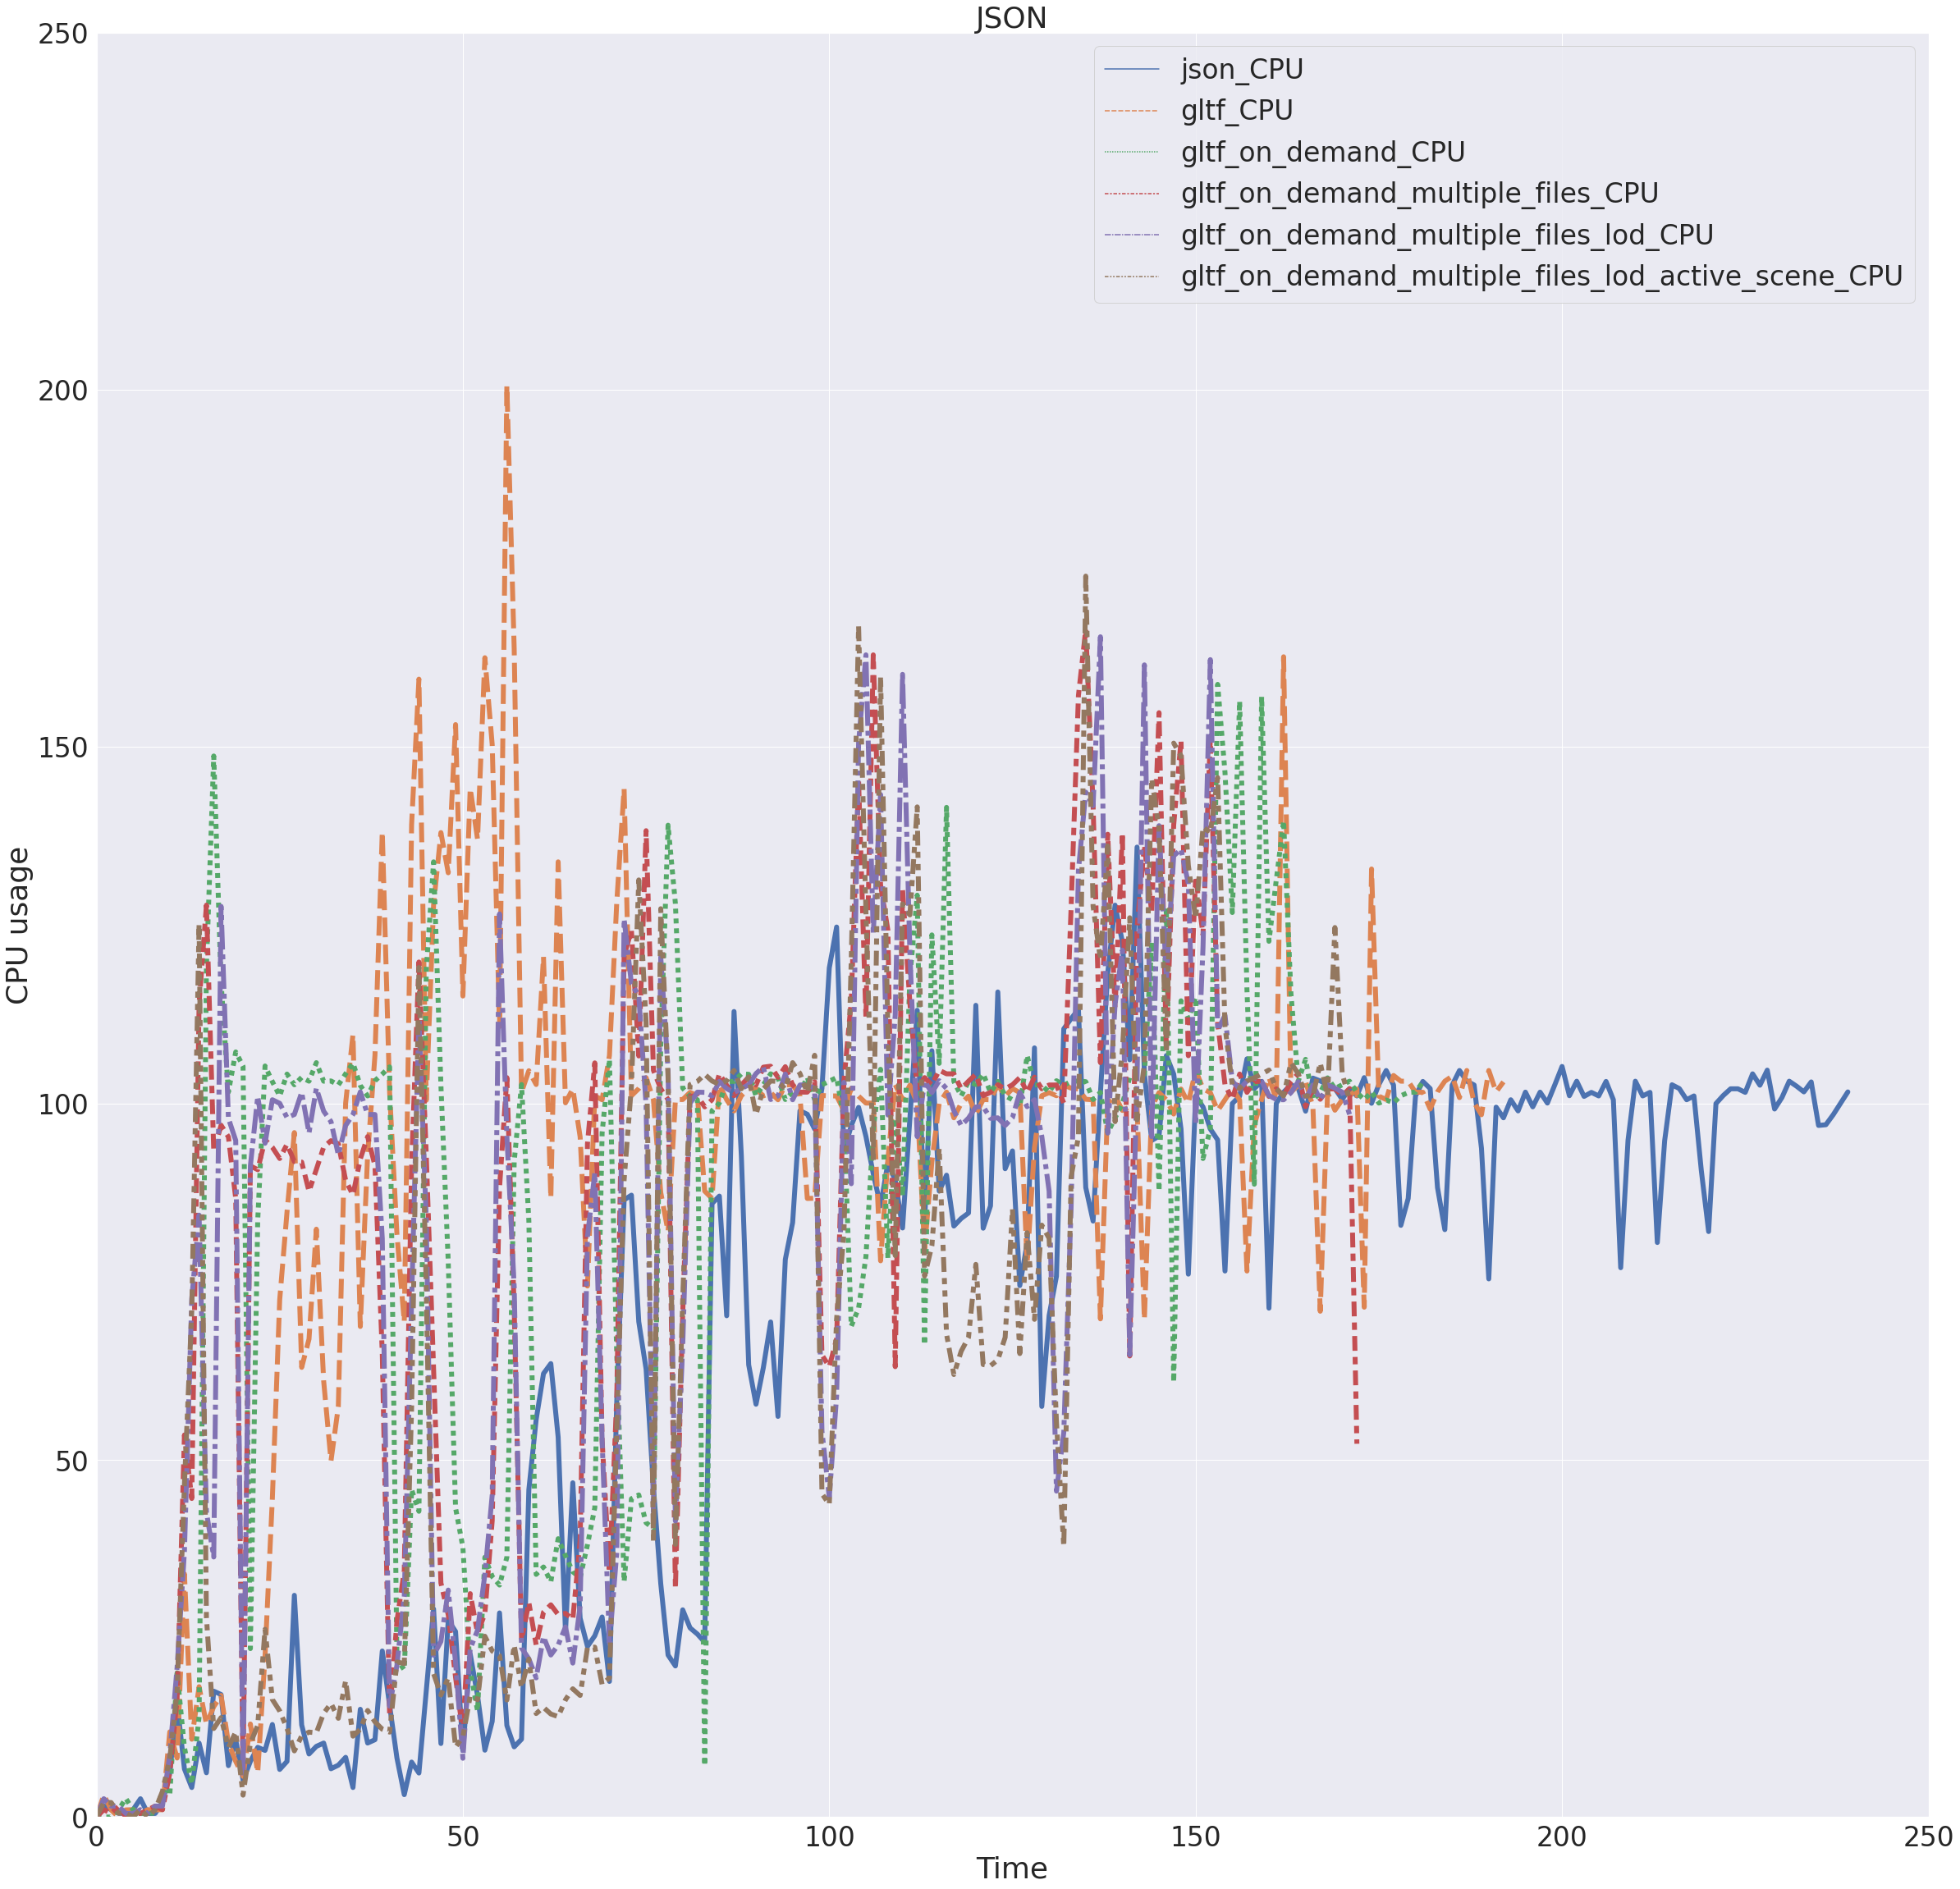

In [95]:
ax = sns.lineplot(data=cpu_df, linewidth='6')
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 250))
ax.set(title='JSON', xlabel='Time', ylabel='CPU usage')
plt.show()

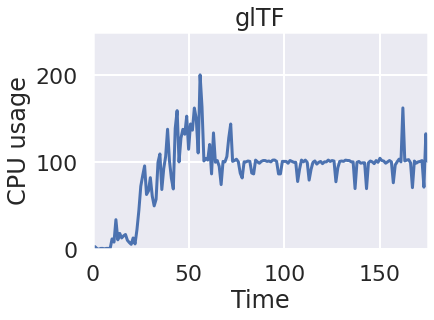

In [21]:
ax = sns.lineplot(data=cpu_df['gltf_CPU'])
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 175))
ax.set(title='glTF', xlabel='Time', ylabel='CPU usage')
plt.show()

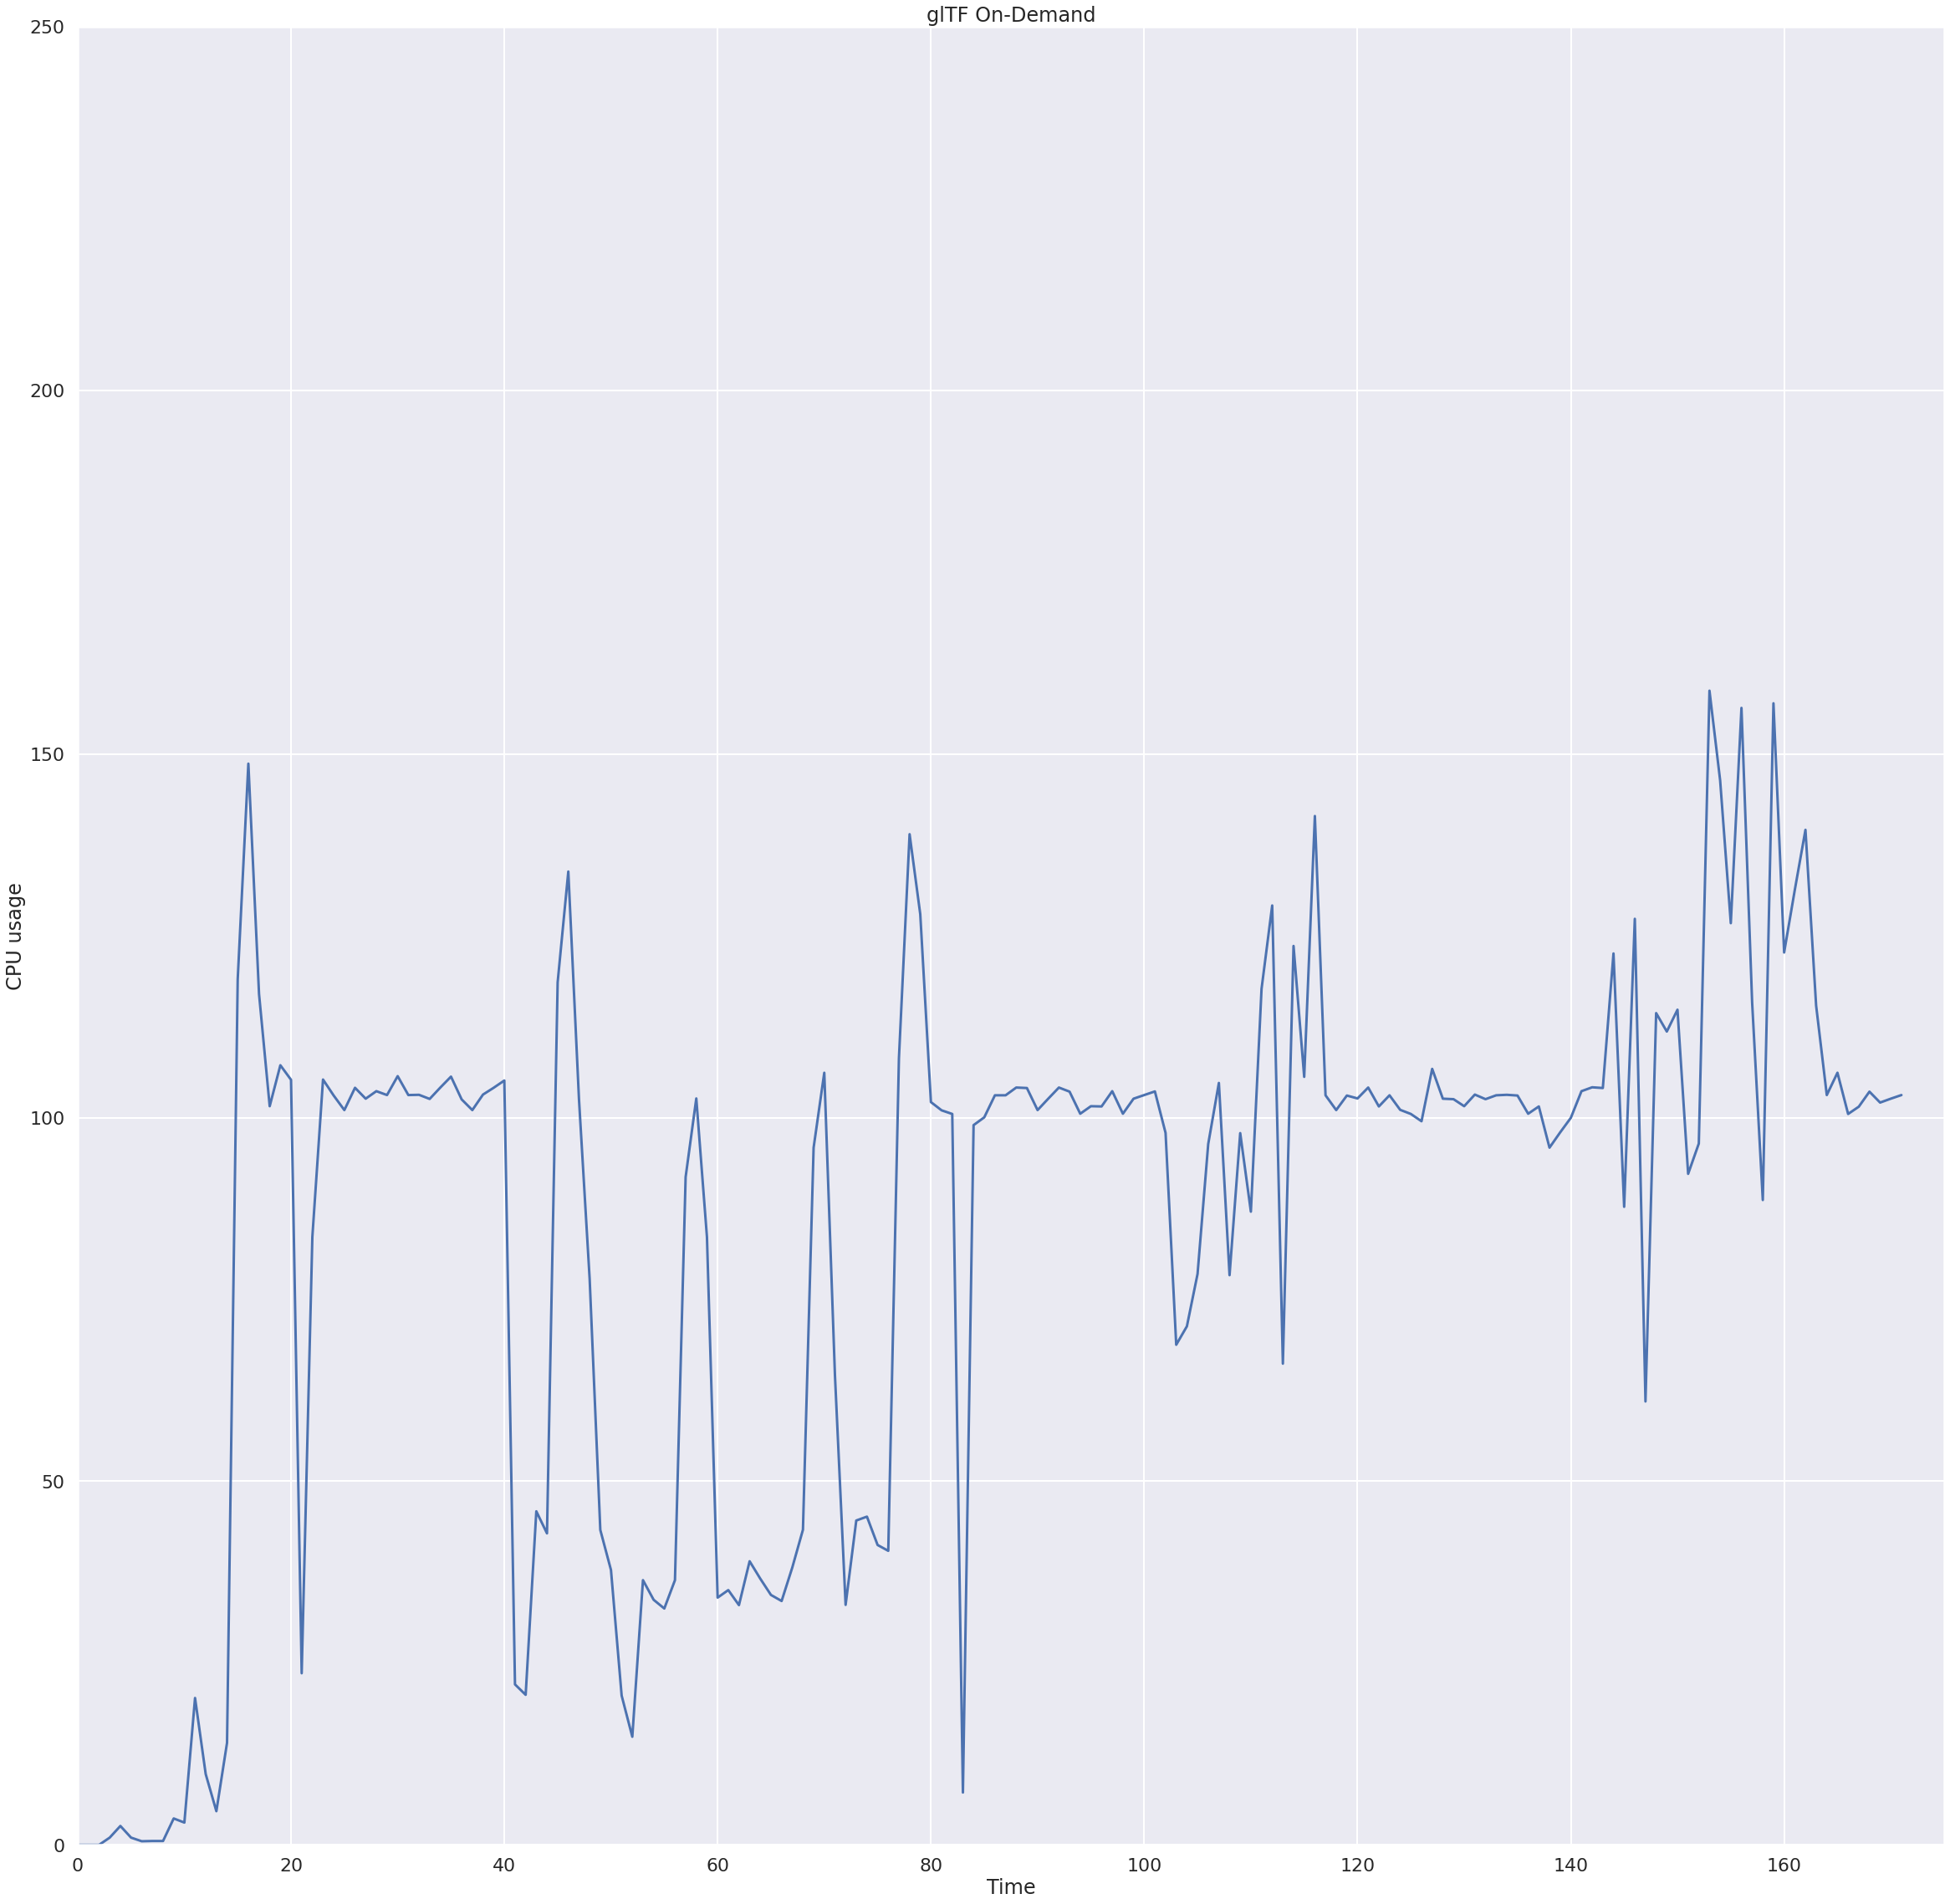

In [36]:
ax = sns.lineplot(data=cpu_df['gltf_on_demand_CPU'])
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 175))
ax.set(title='glTF On-Demand', xlabel='Time', ylabel='CPU usage')
plt.show()

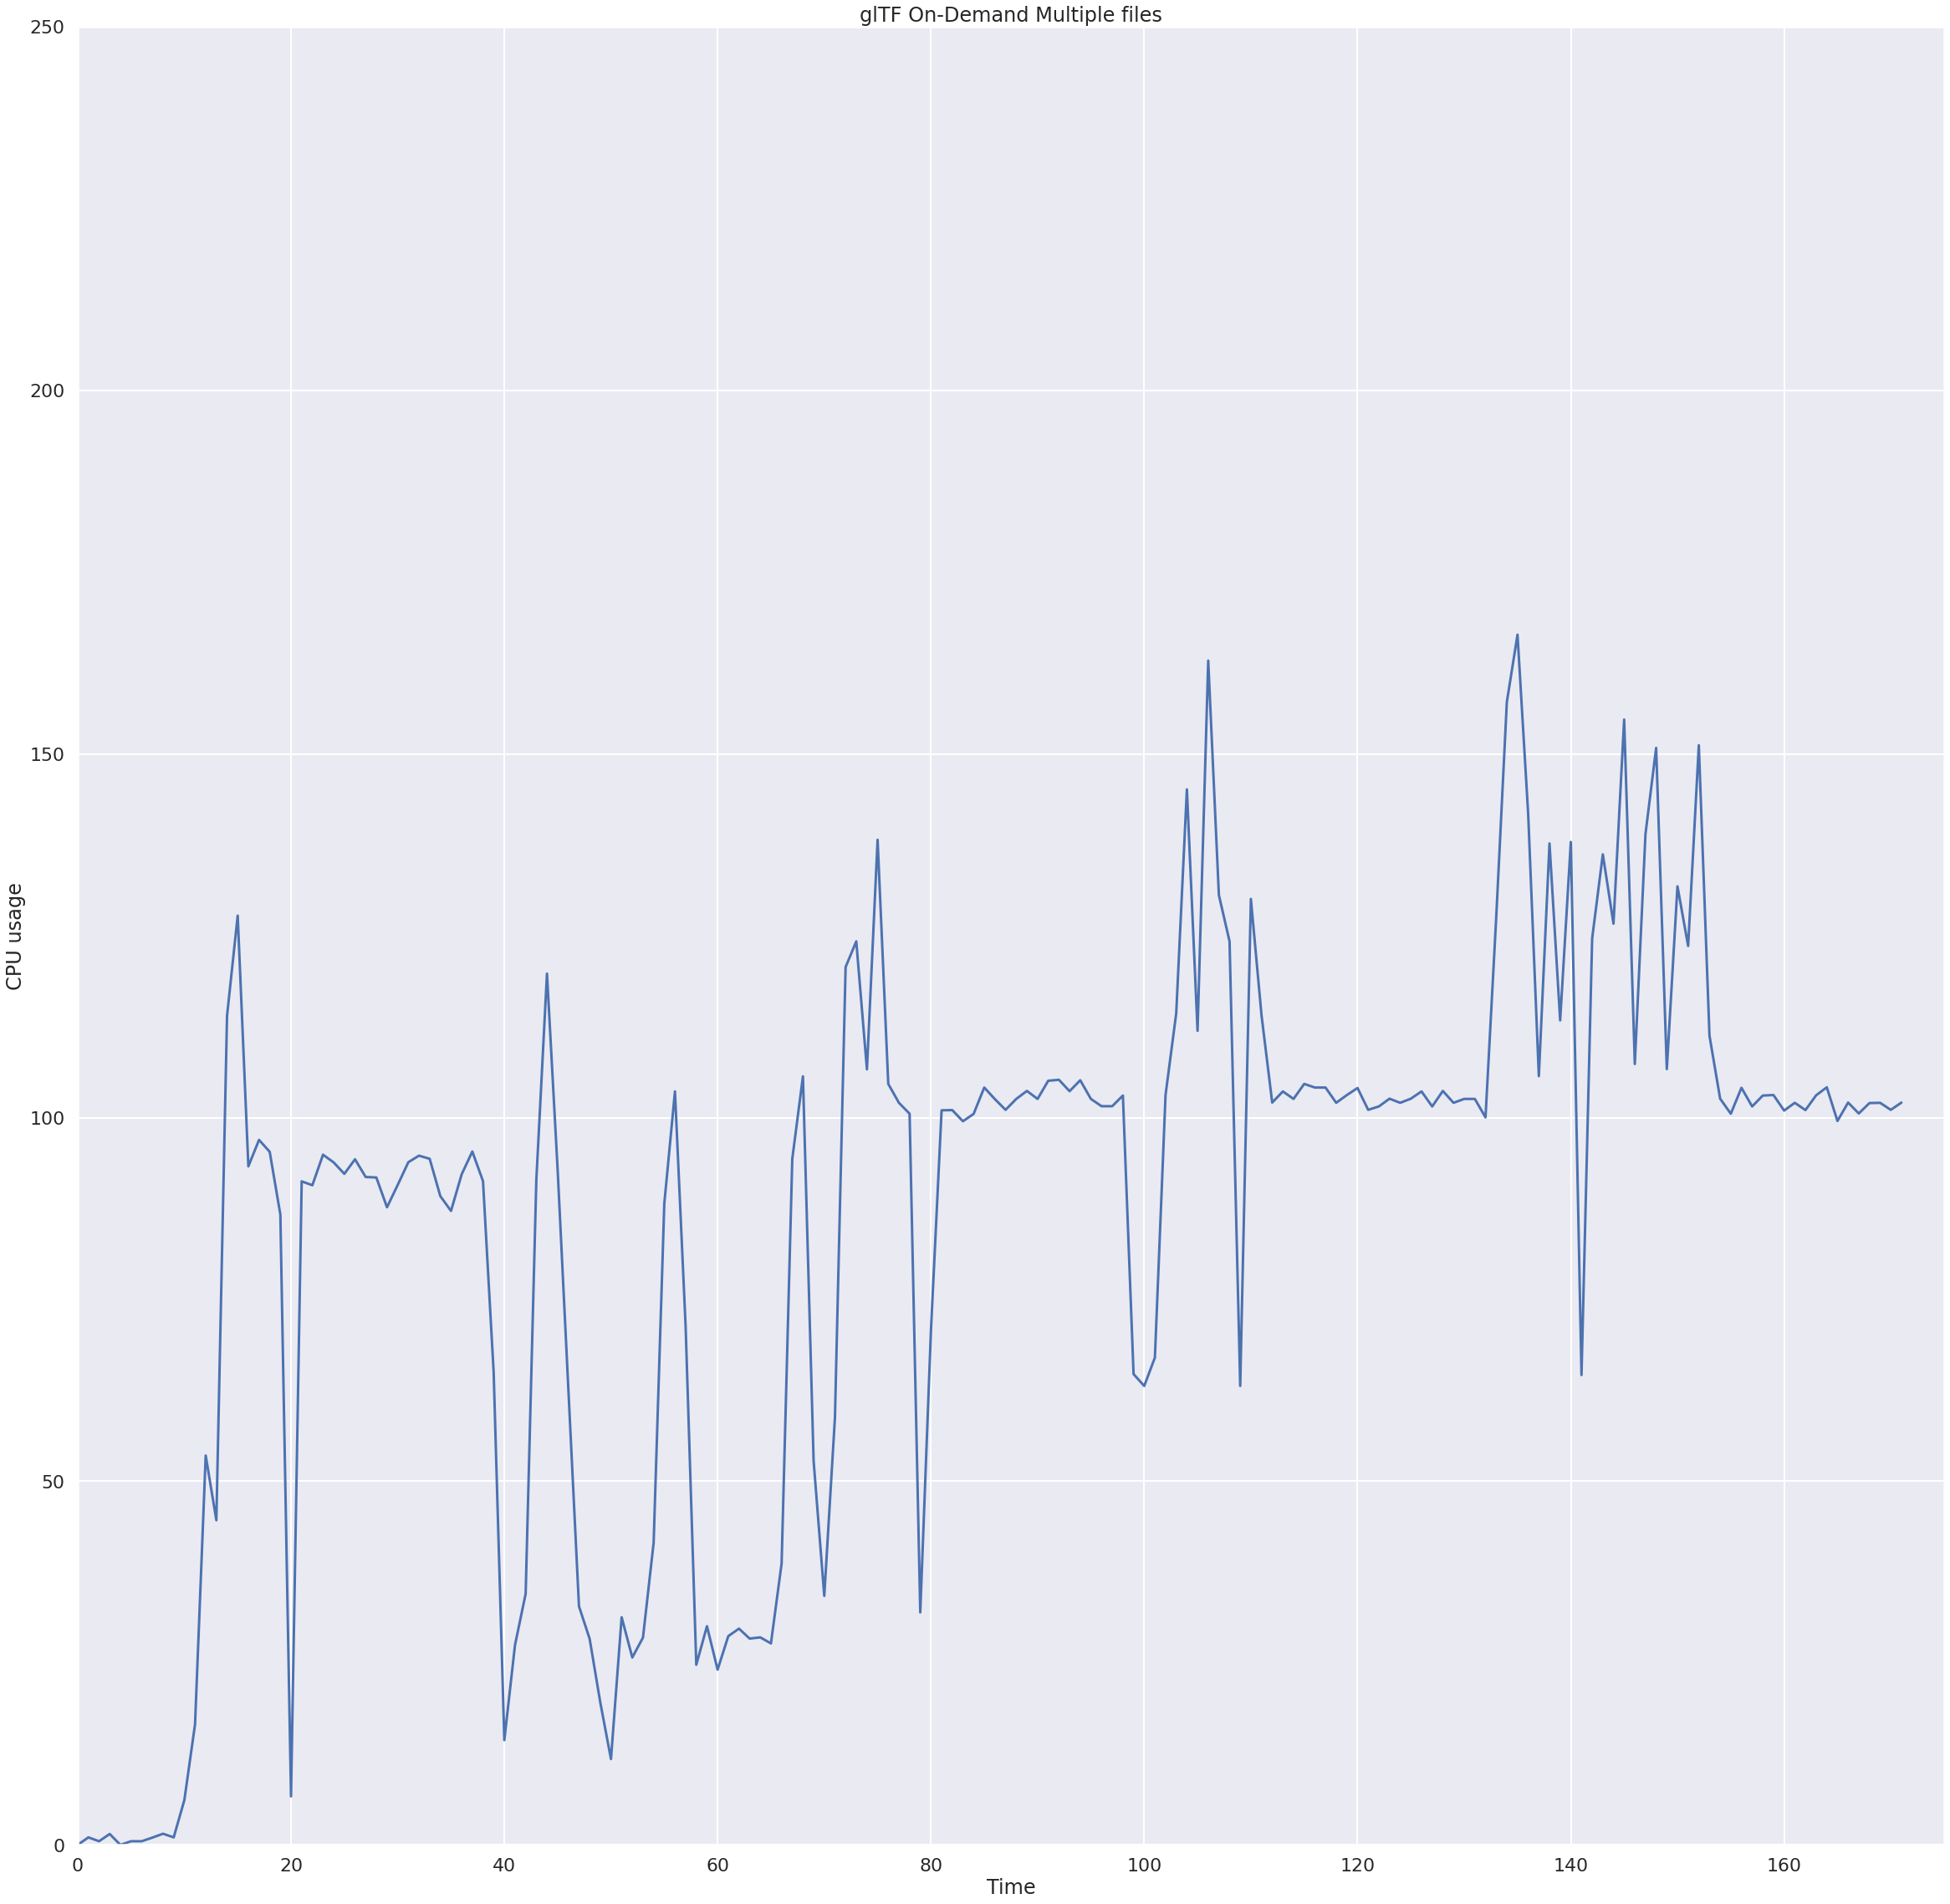

In [37]:
ax = sns.lineplot(data=cpu_df['gltf_on_demand_multiple_files_CPU'])
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 175))
ax.set(title='glTF On-Demand Multiple files', xlabel='Time', ylabel='CPU usage')
plt.show()

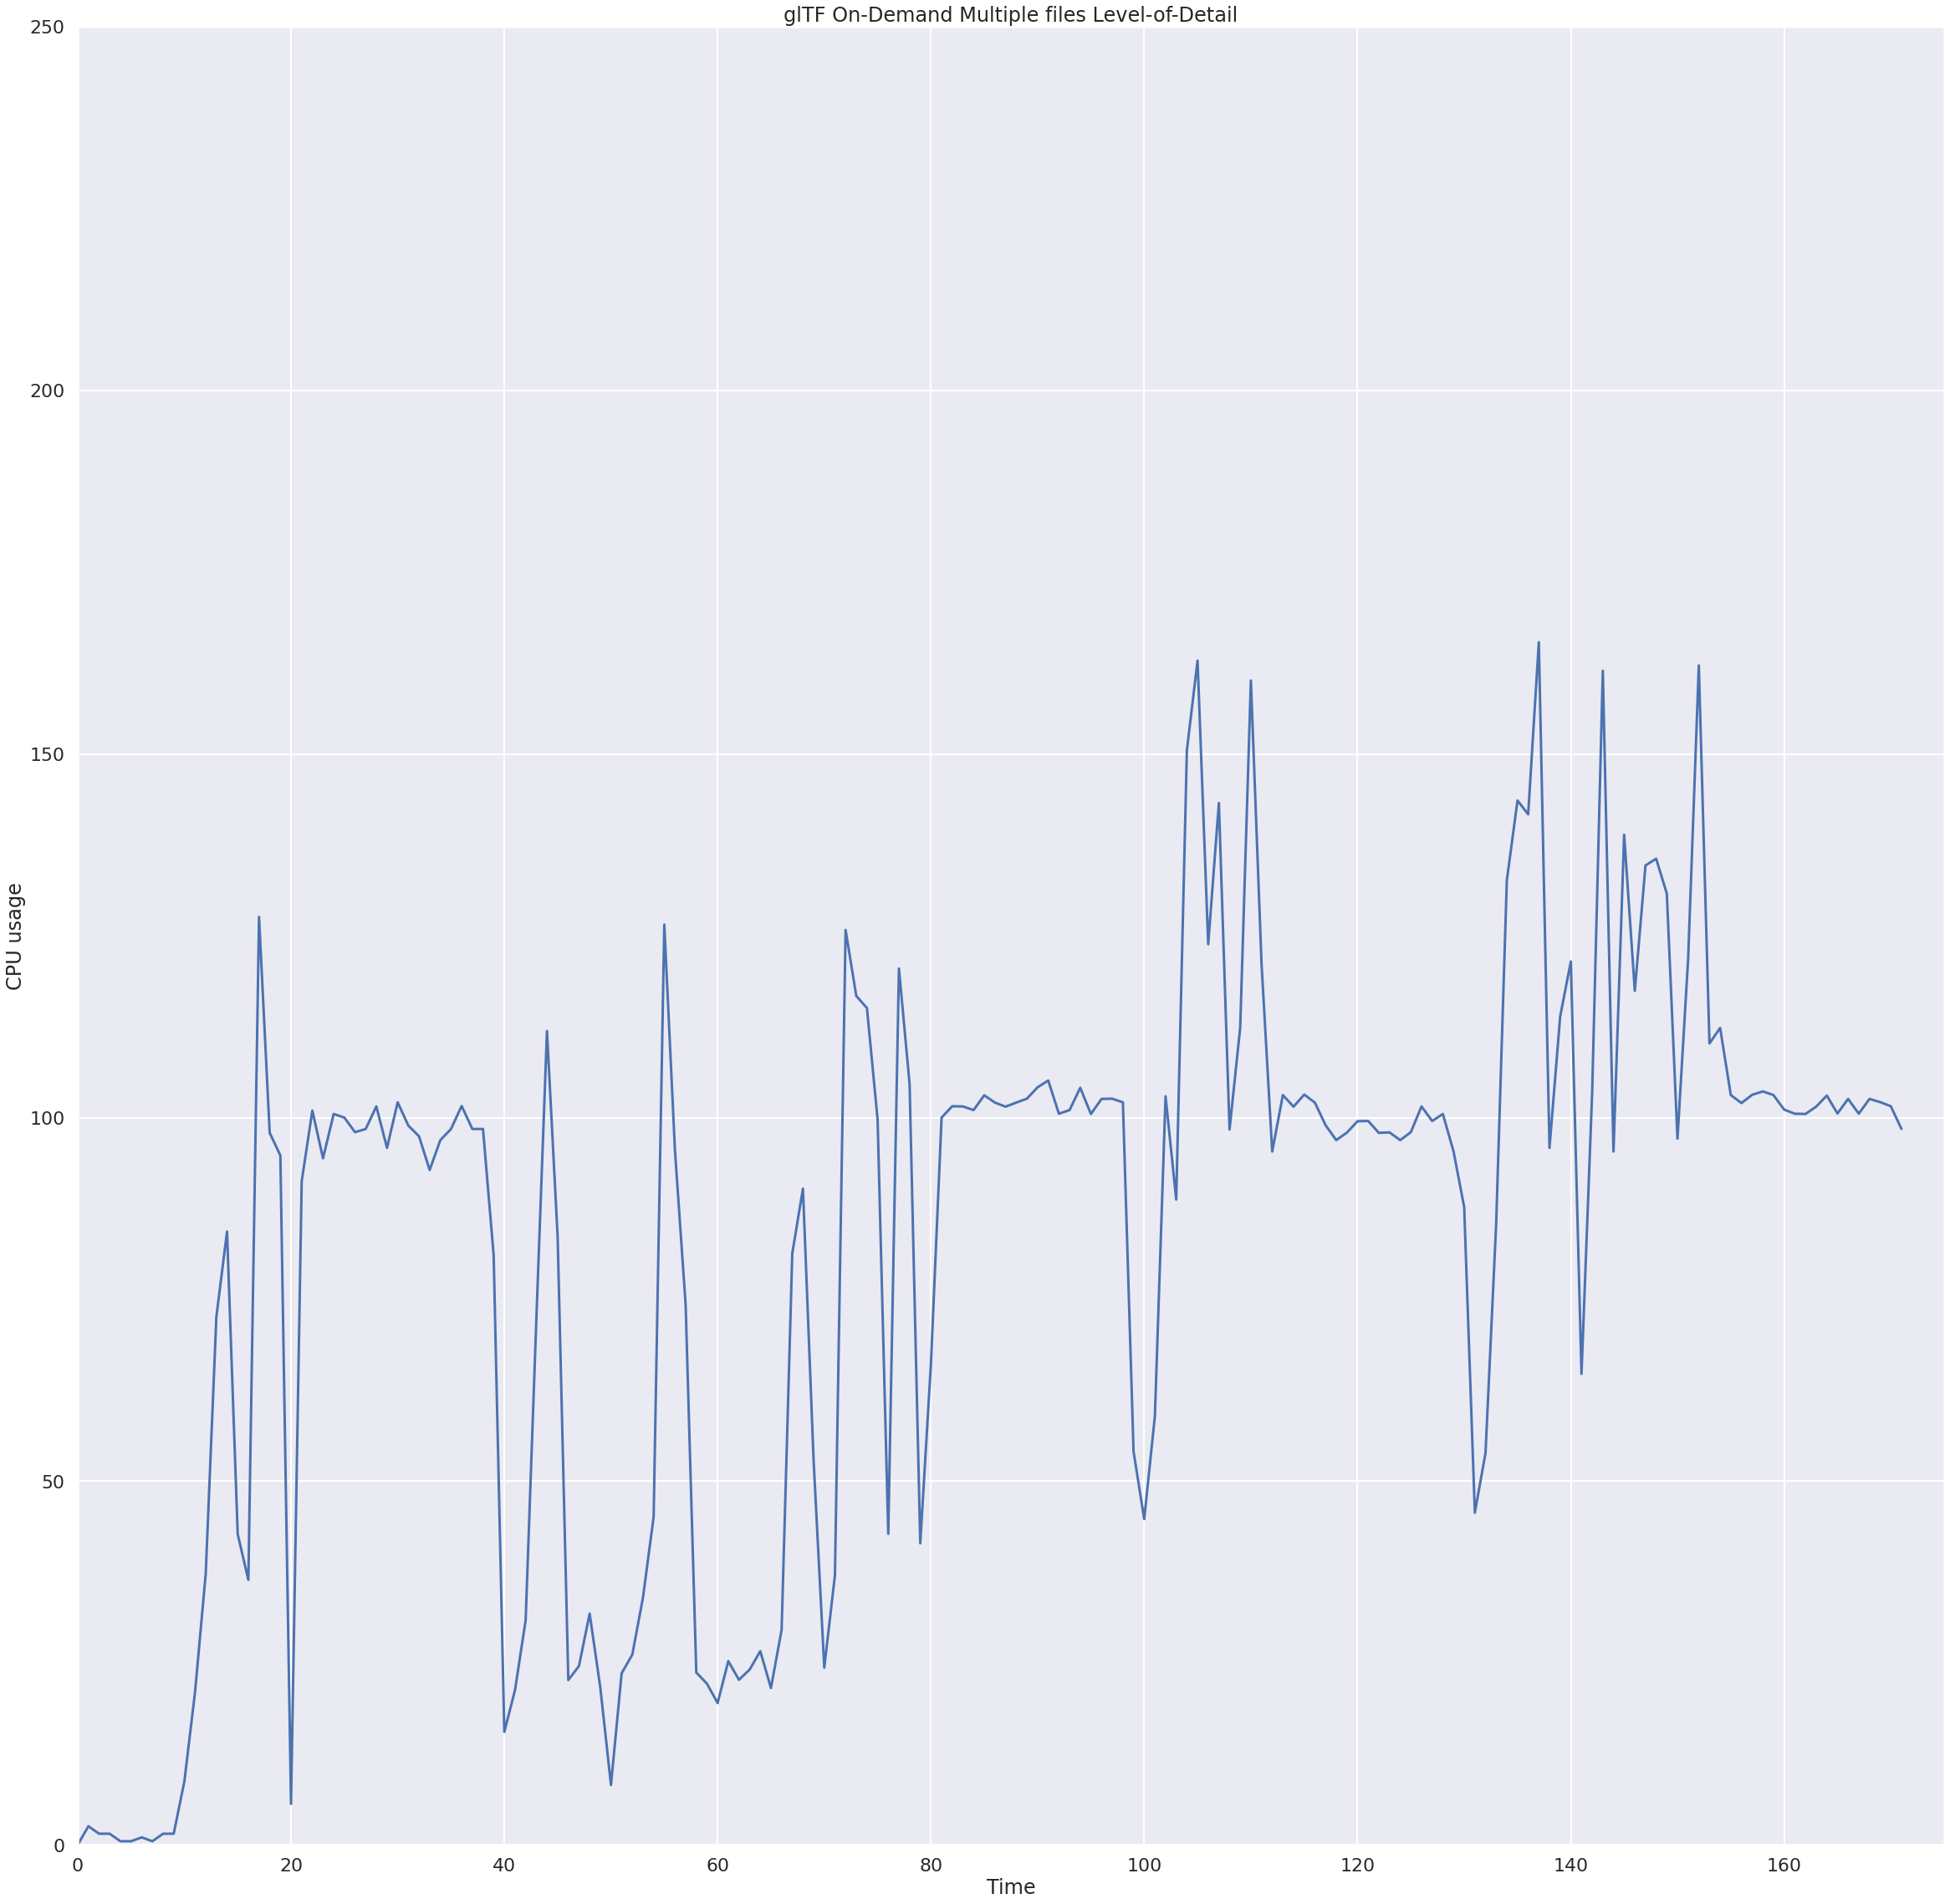

In [38]:
ax = sns.lineplot(data=cpu_df['gltf_on_demand_multiple_files_lod_CPU'])
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 175))
ax.set(title='glTF On-Demand Multiple files Level-of-Detail', xlabel='Time', ylabel='CPU usage')
plt.show()

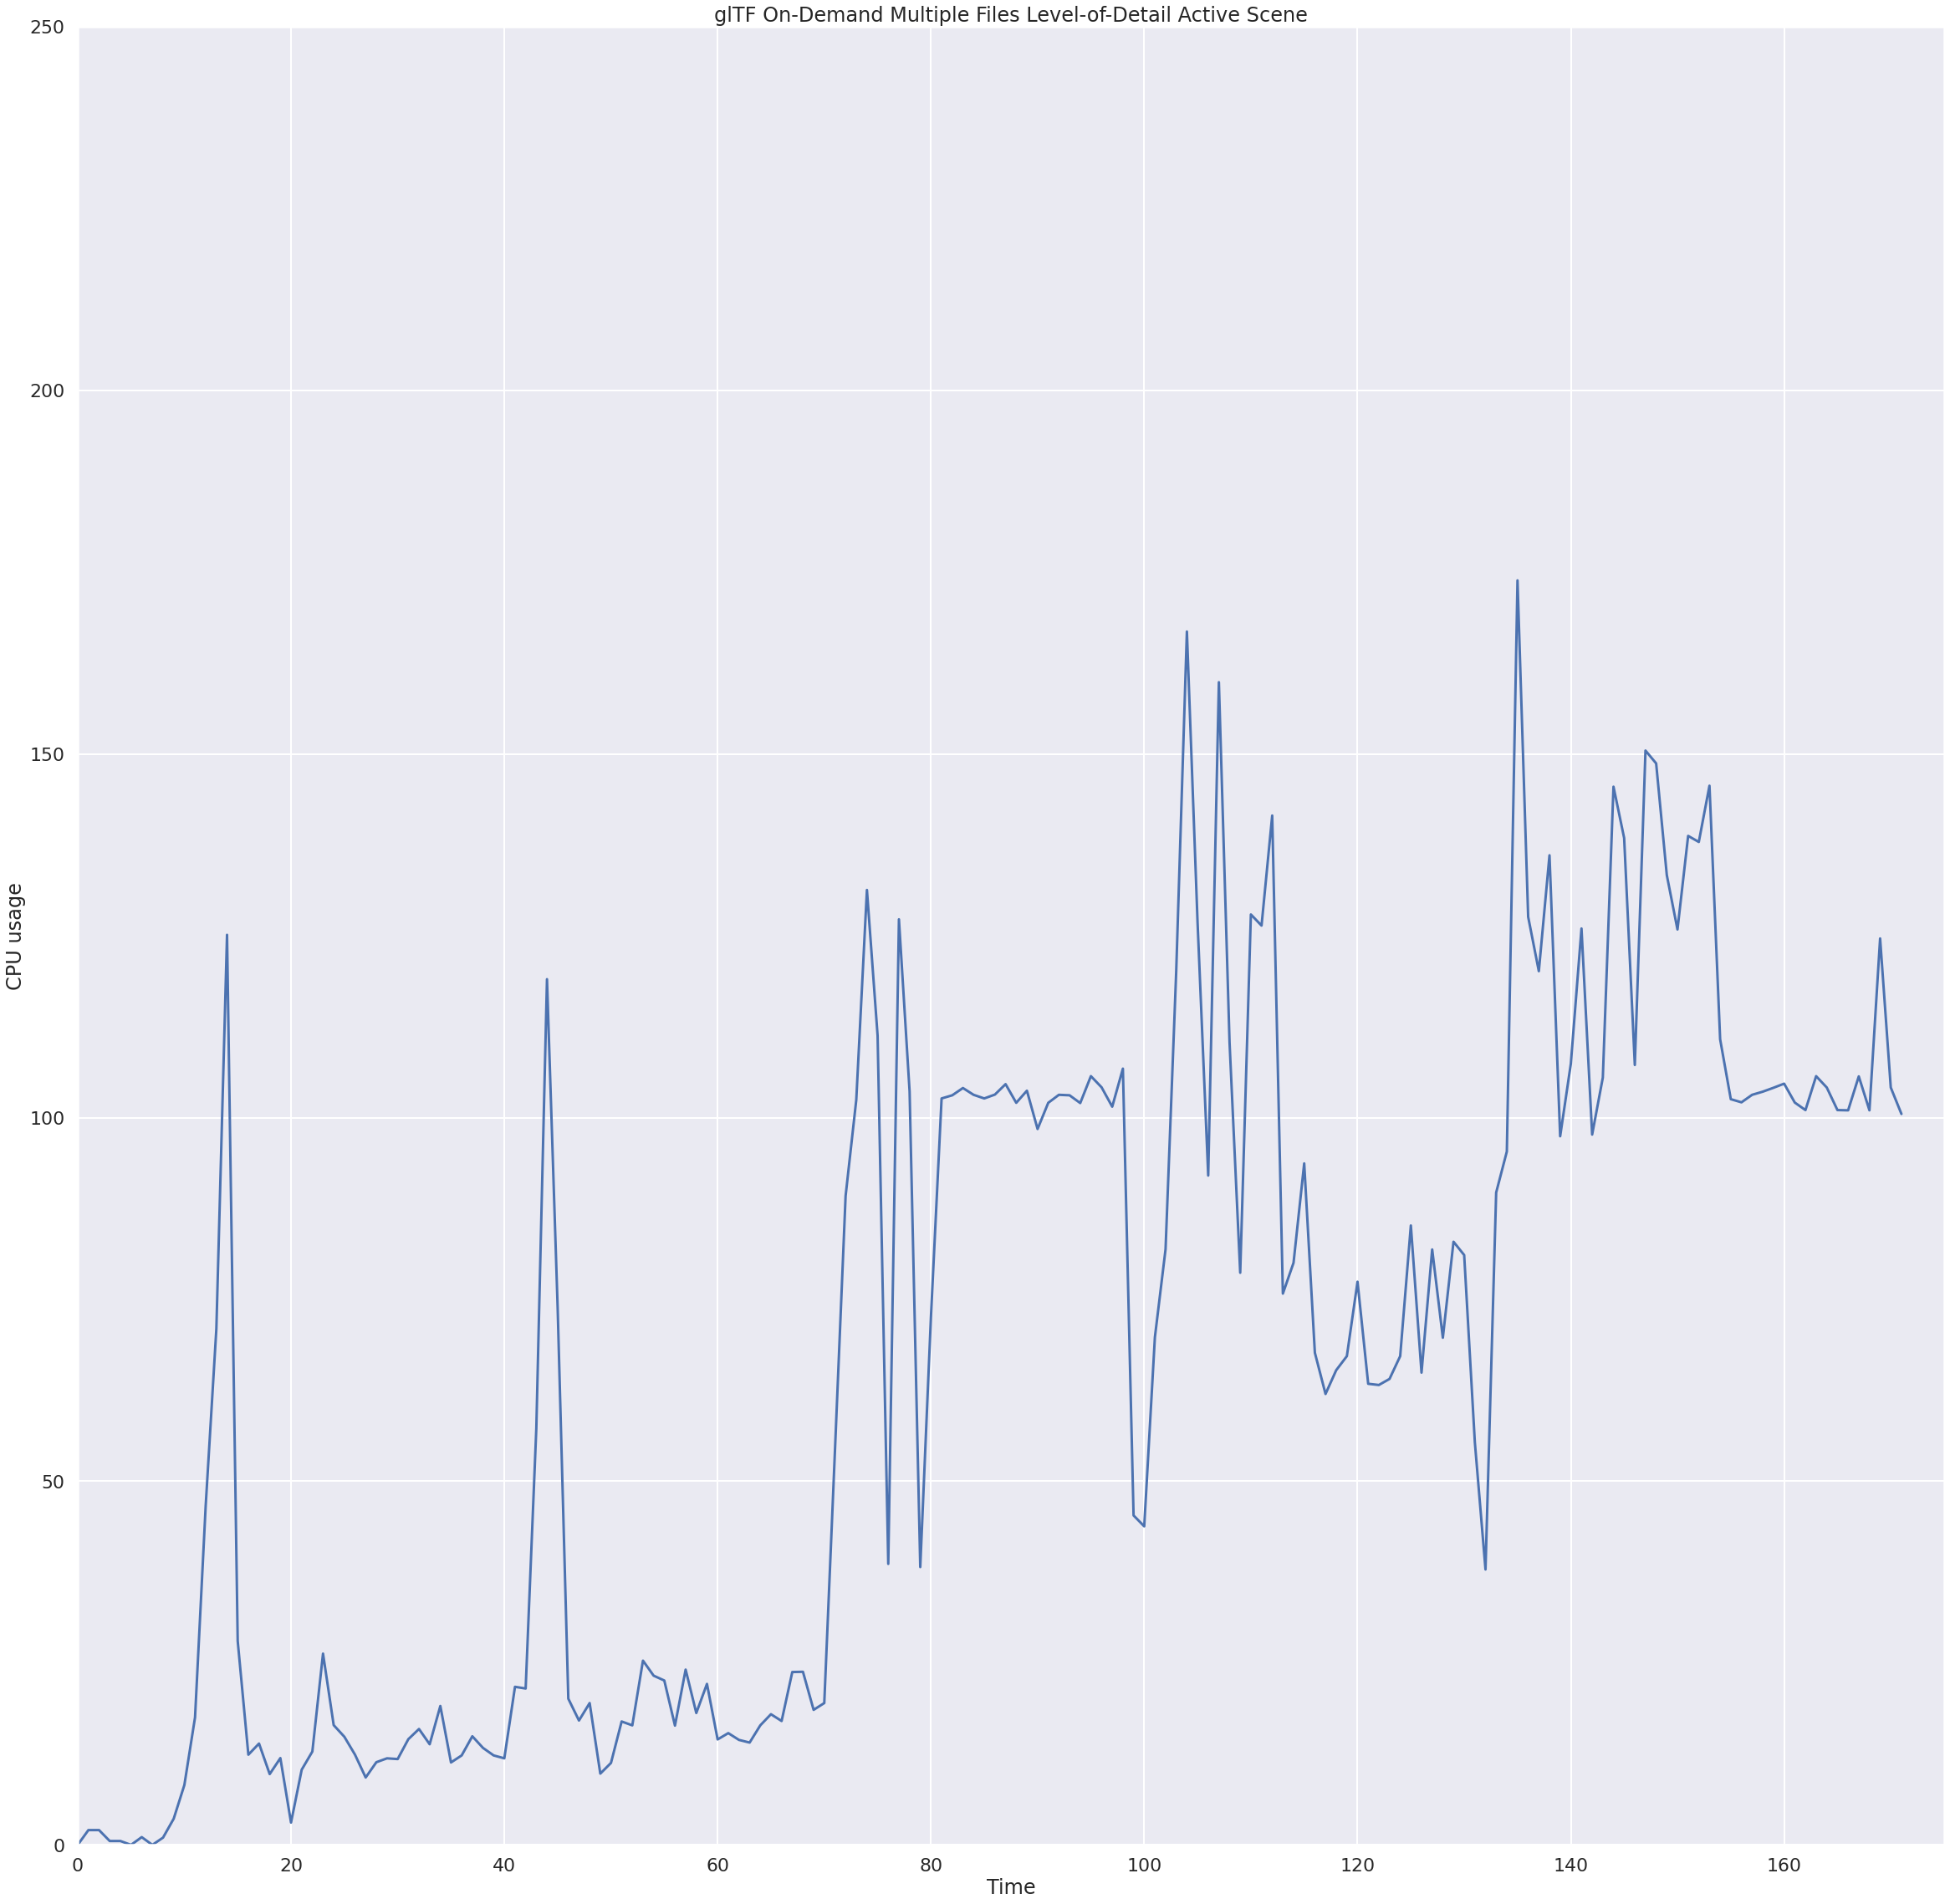

In [32]:
ax = sns.lineplot(data=cpu_df['gltf_on_demand_multiple_files_lod_active_scene_CPU'])
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 175))
ax.set(title='glTF On-Demand Multiple Files Level-of-Detail Active Scene', xlabel='Time', ylabel='CPU usage')
plt.show()

In [7]:
cpu_avg = cpu_df.mean()
cpu_avg

json_CPU                                              63.658960
gltf_CPU                                              88.787283
gltf_on_demand_CPU                                    85.508671
gltf_on_demand_multiple_files_CPU                     90.626012
gltf_on_demand_multiple_files_lod_CPU                 85.975723
gltf_on_demand_multiple_files_lod_active_scene_CPU    67.743931
dtype: float64

# Memory statistics

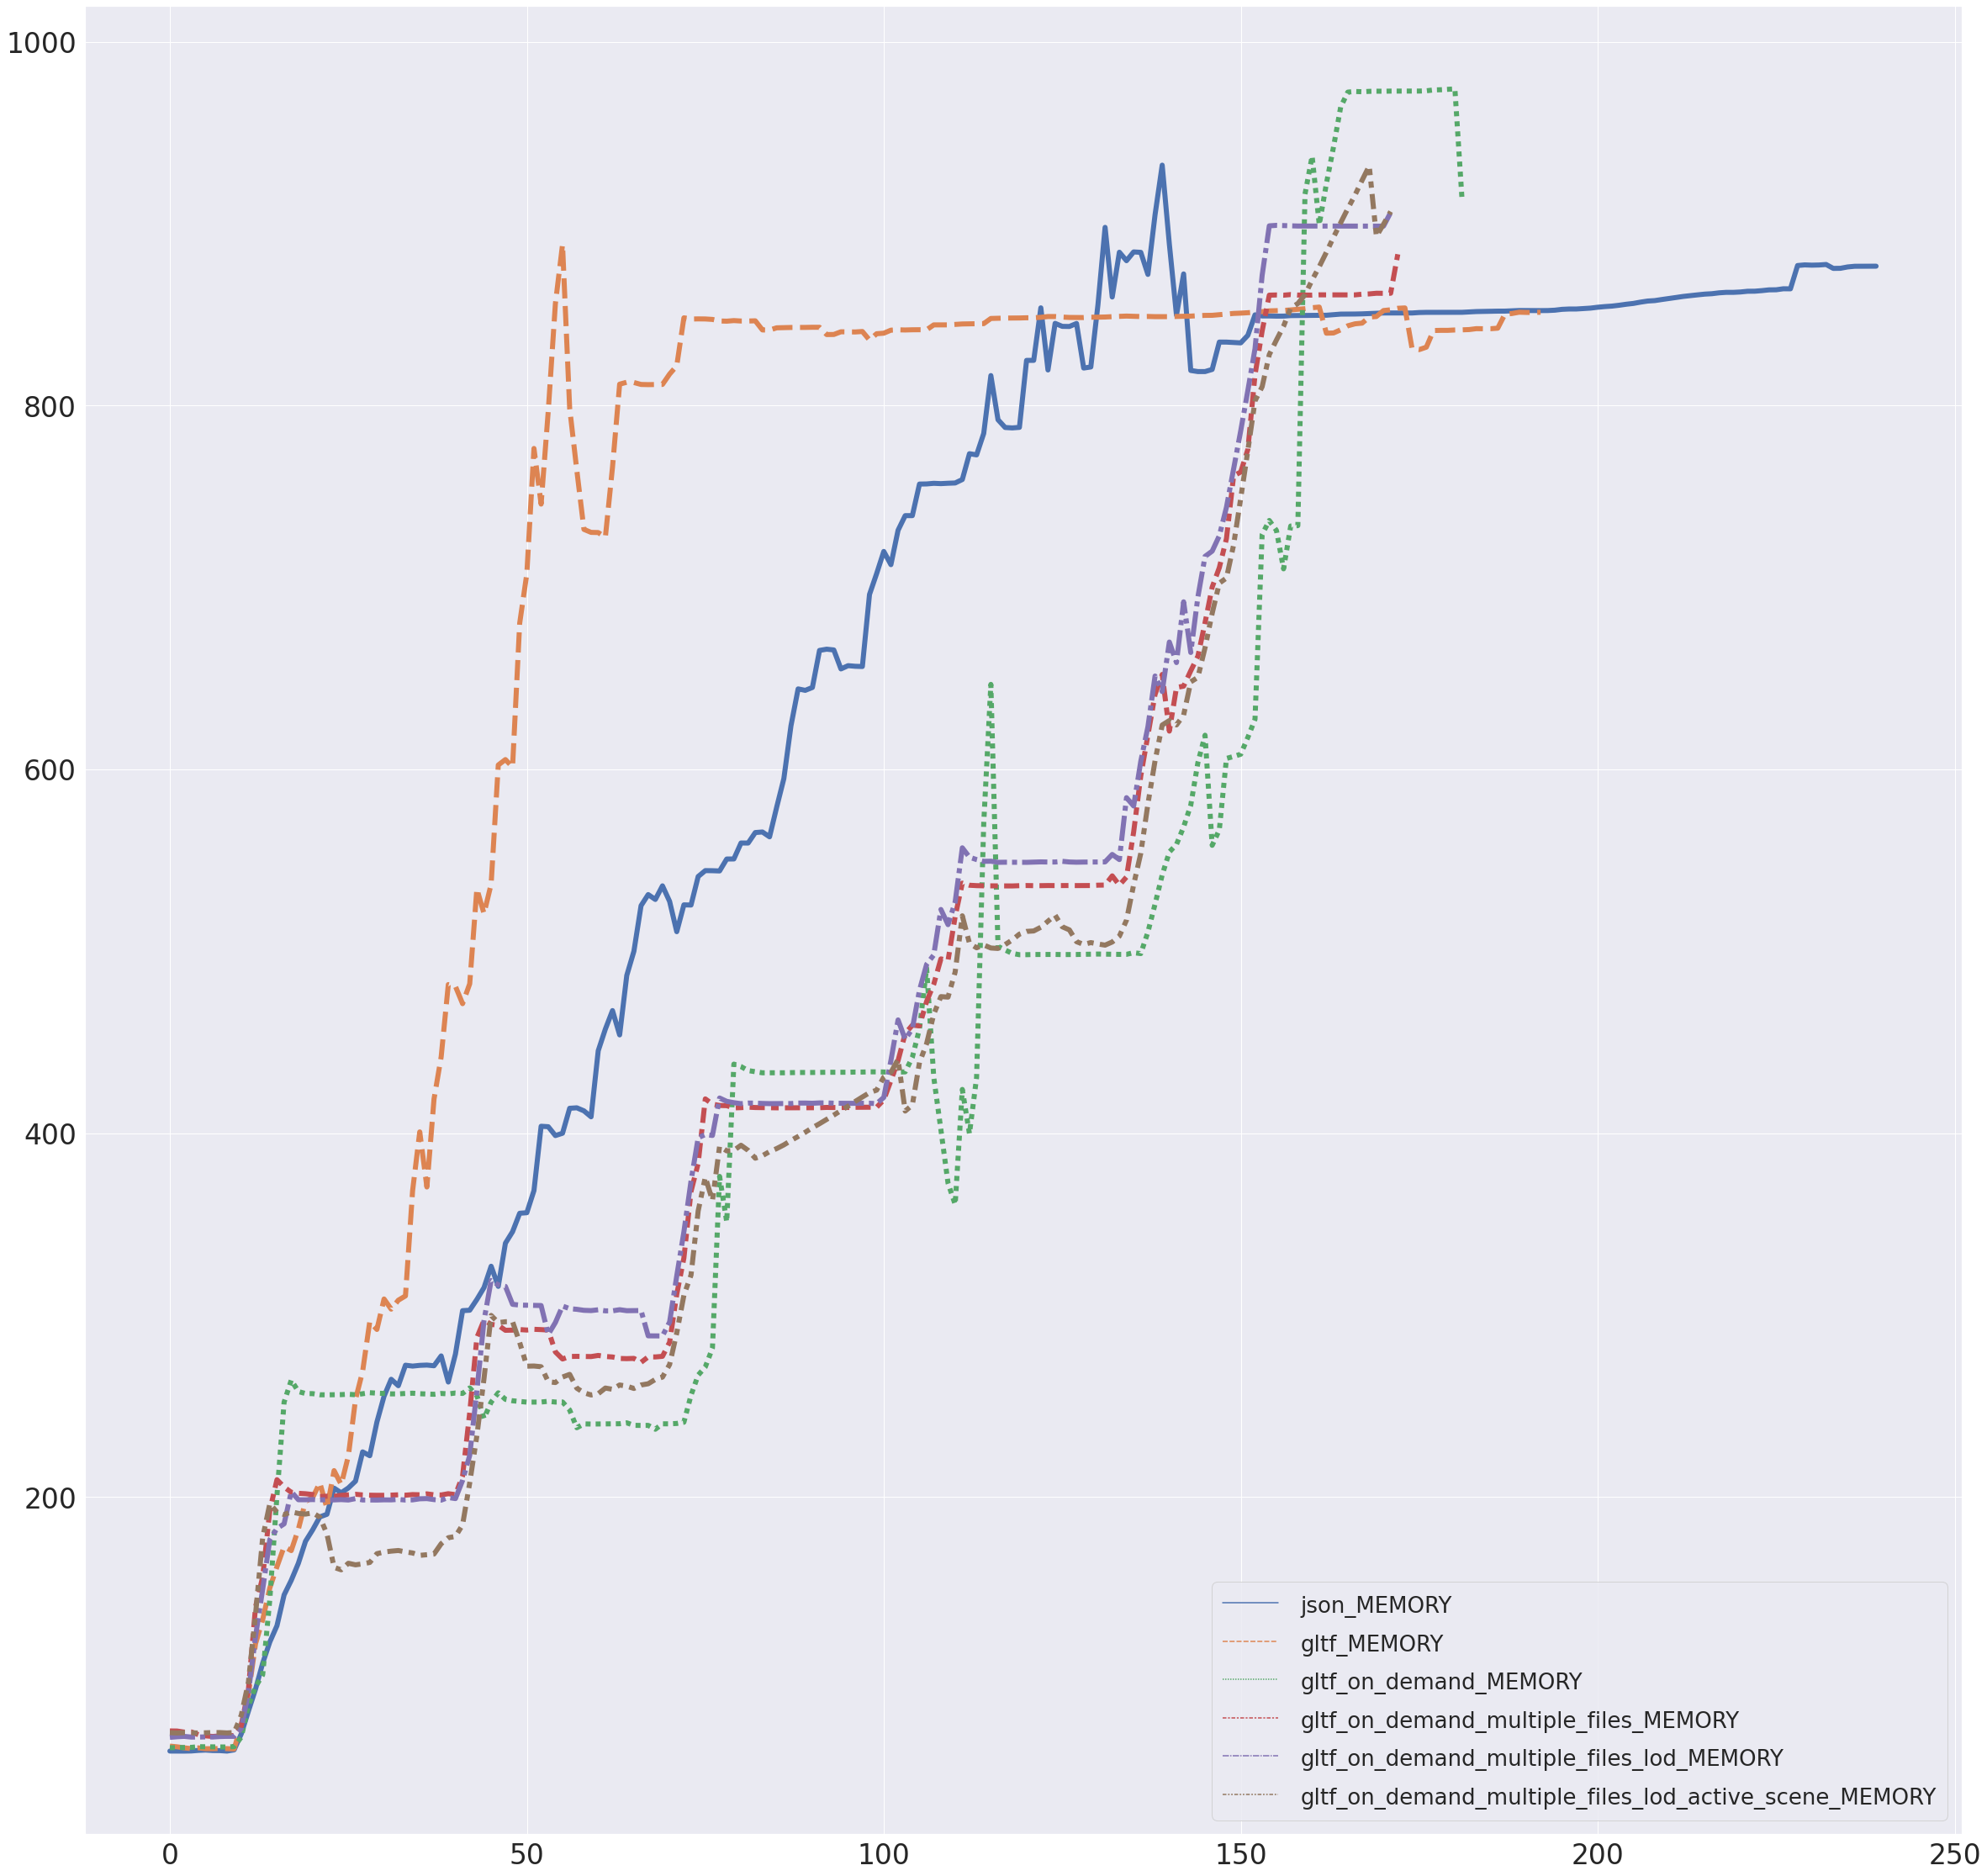

In [98]:
ax = sns.lineplot(data=memory_df, sort=True, linewidth='6')
plt.setp(ax.get_legend().get_texts(), fontsize='26')
plt.show()

In [9]:
memory_avg = memory_df.mean()
memory_avg

json_MEMORY                                              542.126152
gltf_MEMORY                                              687.957438
gltf_on_demand_MEMORY                                    393.034456
gltf_on_demand_multiple_files_MEMORY                     413.878297
gltf_on_demand_multiple_files_lod_MEMORY                 433.442851
gltf_on_demand_multiple_files_lod_active_scene_MEMORY    409.151463
dtype: float64